EXPLORING THE INDIAN STARTUP ECOSYSTEM 

BUSINESS UNDERSTANDING


This project analyze the funding recieved by startups in india from 2018 to 2021. the goal is to investigate the india startups ecosystem and propose strategic recommendations based on data-driven insight, the datasets are provided for each year. and this analysis will cover startups details,funding amounts, and investors information. data is stored across various sources and it is crucial to gather,clean and analyze this data to drive meaningful insights.

HYPOTHESIS

Null Hypothesis(Ho):there is no significant difference in the amount of funding between startups in  bengaluru and other startups location.
Alternative hypothesis(H1): There is a significant difference in the amount of funding between startups in bengaluru and other startup location. 

ANALYTICAL QUESTIONS

1. What sector  has shown the highest growth in term of funding  recieve over the past 4 years?
2. what geograhical region within india have emerged as the primary hubs for startsup activities and investment and what factors contribute to their prominence
3. Are there any notable differences in funding patterns between early-stage startups and more established companies?
4. which sectors recieve the lowest level of funding and which sector recieve the highest level of funding in india and what factor contribute to this?
5.  which investors has more impact on startsup over the years?



DATA UNDERSTANDING

FEATURE DESCRIPTION

 

Company_Brand:Name of the company/startup

Founded:it contains the year the companies were created


Headquarter: where the companies are located in indian i.e the geographical locations of the companies 


Sectors: sector of service


what it does: the description about what the companies does


founders: the names of those who found the companies


investors: these are the names of the shareholders/those who invested in the companies 


Amount($): the amount invested in the starting of the companies


Stage:round of funding reached


Funding_Year: the year each business where funded 


In [2]:
%pip install pyodbc
%pip install python-dotenv
%pip install scipy
%pip install missingno

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [3]:
# import all necessary libraries

#data manipulation
import numpy as np
import pandas as pd 
import missingno as msno

#statistical libaries
from scipy import stats
import statistics as stat
import statsmodels.api as sm
from statsmodels.formula.api import ols 

#data visualization libraries
import matplotlib.pyplot as plt #both the matplotlib and seaborn will be used for visualization of data
import seaborn as sns 

#database connection libraries
import pyodbc #this library package is used to connect to database servers
from dotenv import dotenv_values

#hide warnings
import warnings
warnings.filterwarnings('ignore')

Setup Database Connection to extract  2020 and 20201 datasets

In [4]:

# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')
 
# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("UID")
password = environment_variables.get("PWD")


In [5]:

# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete.
# Check your internet connection if it takes more time than necessary
 
connection = pyodbc.connect(connection_string)


In [6]:
# loading the 2020 dataset from SQL Server
query="SELECT * FROM dbo.LP1_Startup_funding2020"
data_2020=pd.read_sql(query, connection)
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [7]:
# check some of the information of the data1
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [8]:
data_2020.shape

(1055, 10)

In [9]:
query="SELECT * FROM dbo.LP1_Startup_funding2021"
data_2021=pd.read_sql(query, connection)
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [10]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [11]:
data_2019=pd.read_csv('C:/Users/BALKIS/OneDrive - Azubi Africa/my azubi africa career accelerator projects/LP1/Hypothesis-Testing-and-Eda-on-Indian-Startups-Ecosystem/notebooks/startup_funding2019.csv')
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [12]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [13]:
data_2018=pd.read_csv("C:/Users/BALKIS/OneDrive - Azubi Africa/my azubi africa career accelerator projects/LP1/Hypothesis-Testing-and-Eda-on-Indian-Startups-Ecosystem/notebooks/startup_funding2018.csv")
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [14]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


Data Assesment

After the data has been loaded, a visual assessment was done on the quality of the data. we realized there are some  issues with the data,this include;
1. inconsistency with the data and some missing column
2. inconsistence values and currencies in the amount column
3. inconsistent values in the sector,location and industry column

DATA CLEANING OF THE 2020 DATASET

In [15]:
# convert to dataframe
df_2020=pd.DataFrame(data_2020)
df_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [16]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [17]:
# add year column to indicate which year the company where funded
df_2020['Funding_Year']=2020
df_2020['Funding_Year']=pd.to_datetime(df_2020['Funding_Year'],format='%Y',errors='coerce')


In [18]:
df_2020.nunique()

Company_Brand    905
Founded           26
HeadQuarter       77
Sector           302
What_it_does     990
Founders         927
Investor         848
Amount           300
Stage             42
column10           2
Funding_Year       1
dtype: int64

In [19]:
# rename the amount column 
df_2020 = df_2020.rename(columns={'Amount': 'Amount($)'})


In [20]:
df_2020.describe().T

,count,mean,min,25%,50%,75%,max,std
Founded,842.0,2015.36342,1973.0,2014.0,2016.0,2018.0,2020.0,4.097909
Amount($),801.0,113042969.543071,12700.0,1000000.0,3000000.0,11000000.0,70000000000.0,2476634939.888347
Funding_Year,1055,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00,NaN


In [21]:
df_2020.isnull().mean()

Company_Brand    0.000000
Founded          0.201896
HeadQuarter      0.089100
Sector           0.012322
What_it_does     0.000000
Founders         0.011374
Investor         0.036019
Amount($)        0.240758
Stage            0.439810
column10         0.998104
Funding_Year     0.000000
dtype: float64

In [22]:
# check for duplicates
df_2020.duplicated().sum()

3

In [23]:
# drop the duplicates present
df_2020.drop_duplicates()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,column10,Funding_Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020-01-01
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020-01-01
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None,2020-01-01
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None,2020-01-01
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,None,2020-01-01
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,None,2020-01-01
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,None,2020-01-01
1053,Shuttl,2015.0,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,None,2020-01-01


In [24]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company_Brand  1055 non-null   object        
 1   Founded        842 non-null    float64       
 2   HeadQuarter    961 non-null    object        
 3   Sector         1042 non-null   object        
 4   What_it_does   1055 non-null   object        
 5   Founders       1043 non-null   object        
 6   Investor       1017 non-null   object        
 7   Amount($)      801 non-null    float64       
 8   Stage          591 non-null    object        
 9   column10       2 non-null      object        
 10  Funding_Year   1055 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 90.8+ KB


In [25]:
#drop column10 because there are a lot of missing values in it and its an unneccessary column
df_2020.drop(columns='column10', axis=1,inplace=True)


In [26]:
# Converting the founded column to numeric data

df_2020['Founded']=pd.to_datetime(df_2020['Founded'],format='%Y',errors='coerce')


In [27]:

df_2020['Amount($)'].isnull().sum()

254

CLEANING THE AMOUNT COLUMN

The null values in the amount column should be filled with it median

In [28]:
# find the median value
median_value = df_2020['Amount($)'].median()

# fill the null values in the amount column with it median value 
df_2020['Amount($)'].fillna(median_value,inplace=True)

In [29]:
 
# df_2020['Amount'] = df_2020['Amount'].apply(lambda x:float(x))

In [30]:
 
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company_Brand  1055 non-null   object        
 1   Founded        842 non-null    datetime64[ns]
 2   HeadQuarter    961 non-null    object        
 3   Sector         1042 non-null   object        
 4   What_it_does   1055 non-null   object        
 5   Founders       1043 non-null   object        
 6   Investor       1017 non-null   object        
 7   Amount($)      1055 non-null   float64       
 8   Stage          591 non-null    object        
 9   Funding_Year   1055 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 82.6+ KB


CLEANING THE SECTOR COLUMN

In [31]:
 
df_2020['Sector'].unique()

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

In [32]:
mapping_sector_2020 = {
    'AgriTech':'Agriculture', 
    'EdTech':'Education', 
    'Hygiene management':'Healthcare & Life Science', 
    'Escrow':'Financial Services',
    'Networking platform':'IT & Technology',
    'FinTech':'Financial Services',
    'Crowdsourcing':'Business Services',
    'Food & Bevarages':'Consumer Goods', 
    'HealthTech':'Healthcare & Life Science', 
    'Fashion startup':'Consumer Goods',
    'Food Industry':'Consumer Goods',
    'Food Delivery':'Consumer Goods', 
    'Virtual auditing startup':'Financial Services',
    'E-commerce':'Retail',
    'Gaming':'Media & Entertainment', 
    'Work fulfillment':'Business Services',
    'AI startup':'IT & Technology',
    'Telecommunication':'IT & Technology',
    'Logistics':'Transportation & Logistics',
    'Tech Startup':'IT & Technology',
    'Sports':'Others',
    'Retail':'Retail', 'Medtech':'Healthcare & Life Science', 
    'Tyre management':'Transportation & Logistics', 
    'Cloud company':'IT & Technology',
    'Software company':'IT & Technology', 
    'Venture capitalist':'Financial Services',
    'Renewable player':'Energy',
    'IoT startup':'IT & Technology',
    'SaaS startup':'IT & Technology',
    'Aero company':'Manufacturing',
    'Marketing company':'Business Services',
    'Retail startup':'Retail', 
    'Co-working Startup':'Business Services', 
    'Finance company':'Financial Services',
    'Tech company':'IT & Technology', 
    'Solar Monitoring Company':'Energy',
    'Video sharing platform':'Media & Entertainment', 
    'Gaming startup':'Media & Entertainment',
    'Video streaming platform':'Media & Entertainment',
    'Consumer appliances':'Consumer Goods',
    'Blockchain startup':'IT & Technology',
    'Conversational AI platform':'IT & Technology',
    'Real Estate':'Real Estate',
    'SaaS platform':'IT & Technology',
    'AI platform':'IT & Technology',
    'Fusion beverages':'Consumer Goods',
    'HR Tech':'Business Services',
    'Job portal':'Business Services',
    'Hospitality':'Travel & Tourism', 
    'Digital Media':'Media & Entertainment',
    'Dairy startup':'Consumer Goods',
    'Content management':'Business Services',
    'Spacetech':'IT & Technology',
    'Transportation':'Transportation & Logistics',
    'Trading platform':'Financial Services',
    'AI Company':'IT & Technology', 
    'Photonics startup':'IT & Technology',
    'Entertainment':'Media & Entertainment', 
    'Cosmetics':'Consumer Goods',
    'Scanning app':'IT & Technology', 
    'Skincare startup':'Consumer Goods',
    'Food and Beverages':'Consumer Goods', 
    'Biotechnology company':'Healthcare & Life Science', 
    'FoodTech':'Consumer Goods',
    'Proptech':'Real Estate', 
    'CleanTech':'IT & Technology', 
    'Fitness startup':'Healthcare & Life Science',
    'Healthcare':'Healthcare & Life Science',
    'PaaS startup':'IT & Technology',
    'Beverages':'Consumer Goods', 
    'Social Media':'Media & Entertainment', 
    'Automobiles':'Transportation & Logistics',
    'Deeptech':'IT & Technology', 
    'EV startup':'Transportation & Logistics', 
    'AR/VR startup':'IT & Technology', 
    'Recruitment startup':'Business Services',
    'QSR startup':'Consumer Goods',
    'Video platform':'Media & Entertainment',
    'Edtech':'Education',
    'Fertility tech':'Healthcare & Life Science',
    'Luxury car startup':'Transportation & Logistics', 
    'FM':'Consumer Goods', 
    'Food':'Consumer Goods',
    'Nutrition sector':'Consumer Goods',
    'Tech platform':'IT & Technology', 
    'Video':'Media & Entertainment', 
    'Retail Tech':'Retail',
    'HeathTech':'Healthcare & Life Science',
    'Sles and marketing':'Sales & Marketing',
    'LegalTech':'Business Services', 
    'Car Service':'Transportation & Logistics',
    'Bike marketplace':'Transportation & Logistics',
    'Agri tech':'Agriculture', 
    'Reatil startup':'Retail',
    'AR platform':'IT & Technology',
    'Consumer Goods':'Consumer Goods',
    'Content marketplace':'Media & Entertainment', 
    'Interior Design':'Consumer Goods',
    'Rental space':'Real Estate',
    'Soil-Tech':'Agriculture', 
    'Ayurveda tech':'Healthcare & Life Science',
    'Packaging solution startup':'Manufacturing', 
    'Cleantech':'IT & Technology', 
    'Sanitation solutions':'Consumer Goods',
    'HealthCare':'Healthcare & Life Science',
    'Home Design':'Consumer Goods', 
    'InsureTech':'Financial Services', 
    'AI Startup':'IT & Technology',
    'Solar solution':'Energy',
    'Jewellery startup':'Consumer Goods',
    'Multinational conglomerate company':'Others', 
    'Deeptech startup':'IT & Technology',
    'Social Network':'Media & Entertainment',
    'Publication':'Media & Entertainment', 
    'Tech':'IT & Technology',
    'Fashion':'Consumer Goods', 
    'Finance':'Financial Services',
    'Venture capital':'Financial Services',
    'Entreprenurship':'Business Services',
    'Food devlivery':'Consumer Goods',
    'Warehouse':'Transportation & Logistics', 
    'Online financial service':'Financial Services', 
    'Eyeglasses':'Consumer Goods',
    'Battery design':'IT & Technology', 
    'Online credit management startup':'Financial Services',
    'Beverage':'Consumer Goods',
    'TravelTech':'Travel & Tourism', 
    'Agriculture':'Agriculture', 
    'Startup laboratory':'Business Services',
    'Personal care startup':'Consumer Goods', 
    'Customer service company':'Business Services',
    'SaaS\xa0\xa0startup':'IT & Technology', 
    'Marketing startup':'Business Services', 
    'Service industry':'Business Services',
    'Social media':'Media & Entertainment',
    'AI':'IT & Technology', 
    'Jewellery':'Consumer Goods', 
    'AR startup':'IT & Technology',
    'HR Tech startup':'Business Services',
    'Automotive Startup':'Transportation & Logistics', 
    'Food Startup':'Consumer Goods', 
    'EdTech Startup':'Education',
    'Car Trade':'Transportation & Logistics', 
    'EdtTech':'Education',
    'Manufacturing':'Manufacturing',
    'AI Platform':'IT & Technology',
    'Automation':'Transportation & Logistics',
    'Solar SaaS':'Energy',
    'WL & RAC protection':'Consumer Goods',
    'Social commerce':'Retail', 
    'Home interior services':'Consumer Goods', 
    'Agritech startup':'Agriculture',
    'API platform':'IT & Technology', 
    'Deep Tech':'IT & Technology',
    'Electricity':'Energy', 
    'Automotive company':'Transportation & Logistics',
    'FMCG':'Consumer Goods', 
    'Insurance Tech':'Financial Services', 
    'Video personalization':'Media & Entertainment',
    'Software Company':'IT & Technology', 
    'Biomaterial startup':'Healthcare & Life Science', 
    'Health':'Healthcare & Life Science',
    'IT':'IT & Technology',
    'Craft Beer':'Consumer Goods',
    'Healthtech':'Healthcare & Life Science', 
    'Education':'Education', 
    'Investment':'Financial Services',
    'Linguistic Spiritual':'Others', 
    'Construction':'Business Services', 
    'Battery manufacturer':'IT & Technology',
    'Nano Distribution Network':'IT & Technology',
    'AI health':'Healthcare & Life Science',
    'Dating app':'IT & Technology', 
    'Media':'Media & Entertainment',
    'Fintech':'Financial Services', 
    'Healthcare/Edtech':'Healthcare & Life Science', 
    'Social Commerce':'Retail',
    'Agritech/Commerce':'Agriculture',
    'Mobility tech':'Transportation & Logistics', 
    'Social e-commerce':'Retail',
    'Food & Logistics':'Consumer Goods',
    'SpaceTech':'IT & Technology', 
    'Nutrition Tech':'Consumer Goods', 
    'HR':'Business Services', 
    'IoT':'IT & Technology',
    None:None, 
    'Agritech':'Agriculture',
    'Interior design':'Consumer Goods', 
    'Foodtech':'Consumer Goods', 
    'AR/VR':'IT & Technology',
    'Appliance':'Consumer Goods', 
    'HR tech':'Business Services', 
    'Food tech':'Consumer Goods',
    'Mental Health':'Healthcare & Life Science',
    'Ecommerce':'Retail',
    'Solar Solution':'Energy', 
    'SaaS':'IT & Technology',
    'Automobile':'Transportation & Logistics', 
    'B2B marketplace':'Business Services',
    'Fashion Tech':'Consumer Goods',
    'Nutrition tech':'Consumer Goods',
    'Health & Wellness':'Healthcare & Life Science',
    'Cloud Kitchen':'IT & Technology',
    'IoT/Automobile':'Transportation & Logistics', 
    'Eye Wear':'IT & Technology', 
    'Digital tech':'IT & Technology',
    'Data Intelligence':'IT & Technology', 
    'Co-living':'Business Services', 
    'Food & Beverages':'Consumer Goods', 
    'Automotive':'Transportation & Logistics',
    'B2B':'Business Services',
    'Defense tech':'IT & Technology',
    'Marketplace':'Business Services', 
    'Construction tech':'IT & Technology',
    'Nutrition':'Consumer Goods', 
    'Coworking':'Business Services', 
    'Micro-mobiity':'Transportation & Logistics',
    'Auto-tech':'Transportation & Logistics',
    'Beauty':'Consumer Goods',
    'Robotics':'IT & Technology',
    'Yoga & wellness':'Healthcare & Life Science',
    'Logitech':'Transportation & Logistics', 
    'Med Tech':'Healthcare & Life Science',
    'Life sciences':'Healthcare & Life Science',
    'Retail Aggregator':'Retail', 
    'Deep Tech AI':'IT & Technology',
    'Biotech':'Healthcare & Life Science',
    'Blockchain':'IT & Technology', 
    'HrTech':'Business Services',
    'Mobility/Transport':'Transportation & Logistics',
    'Travel':'Travel & Tourism',
    'Rental':'Retail',
    'AI & Debt':'Financial Services', 
    'SaaS/Edtech':'IT & Technology', 
    'Transport':'Transportation & Logistics', 
    'Co-working':'Business Services',
    'Insurtech':'Financial Services',
    'Cryptocurrency':'IT & Technology', 
    'Automotive tech':'Transportation & Logistics', 
    'Legal':'Business Services', 
    'Fitness':'Healthcare & Life Science',
    'EV':'Transportation & Logistics',
    'Supply chain,Agritech':'Agriculture', 
    'Pharma':'Healthcare & Life Science',
    'Insurance technology':'Financial Services',
    'Foodtech & Logistics':'Consumer Goods', 
    'Housing':'Real Estate ',
    'Pharmaceutical':'Healthcare & Life Science',
    'Data Analytics':'IT & Technology',
    'Investment Tech':'Financial Services', 
    'Financial Services':'Financial Services',
    'Biopharma':'Healthcare & Life Science', 
    'Dairy':'Agriculture', 
    'Beauty & wellness':'Consumer Goods', 
    'Travel & SaaS':'Travel & Tourism',
    'Tourism & EV':'Travel & Tourism', 
    'Media Tech':'Media & Entertainment', 
    'Location Analytics':'IT & Technology', 
    'E store':'Retail',
    'Data Science':'IT & Technology', 
    'Insurance':'Financial Services', 
    'Health and Fitness':'Healthcare & Life Science', 
    'Technology':'IT & Technology',
    'Interior & decor':'Consumer Goods', 
    'eMobility':'Transportation & Logistics',
    'Automation tech':'Transportation & Logistics',
    'Media & Networking':'Media & Entertainment',
    'E-market':'Retail', 
    'AI & Data science':'IT & Technology',
    'Travel tech':'Travel & Tourism',
    'Automotive and Rentals':'Transportation & Logistics',
    'E-tail':'Retail', 
    'Accomodation':'Hospitality',
    'AI & Media':'Media & Entertainment', 
    'Machine Learning':'IT & Technology', 
    'Content Marktplace':'Media & Entertainment',
    'Visual Media':'Media & Entertainment',
    'Hygiene':'Healthcare & Life Science', 
    'VR & SaaS':'IT & Technology', 
    'Sales & Services':'Business Services',
    'AI & Deep learning':'IT & Technology',
    'Housing & Rentals':'Real Estate', 
    'Estore':'Retail', 
    'Marketing':'Business Services',
    'E tailor':'Retail',
    'E-mobility':'Retail', 
    'Ad-tech':'IT & Technology',
    'Neo-banking':'Financial Services',
    'Transport Automation':'Transportation & Logistics',
    'Techonology':'IT & Technology', 
    'Transport & Rentals':'Transportation & Logistics',
    'AI Robotics':'IT & Technology', 
    'Preschool Daycare':'Education', 
    'Food diet':'Consumer Goods', 
    'B2B Agritech':'Agriculture',
    'E-connect':'Retail', 'Tech hub':'IT & Technology', 
    'Consultancy':'Business Services',
    'Pharmacy':'Healthcare & Life Science', 
    'Deisgning':'Consumer Goods',
    'Taxation':'Financial Services',
    'Automobile Technology':'Transportation & Logistics'
    }

In [33]:
# mapping the sectors into the key sectors
df_2020['Sector']=df_2020['Sector'].replace(mapping_sector_2020)
# df_2020['Sector'].replace('Retail Services','Retail')

In [34]:
df_2020['Sector'].unique()

array(['Agriculture', 'Education', 'Healthcare & Life Science',
       'Financial Services', 'IT & Technology', 'Business Services',
       'Consumer Goods', 'Retail', 'Media & Entertainment',
       'Transportation & Logistics', 'Others', 'Energy', 'Manufacturing',
       'Real Estate', 'Travel & Tourism', 'Sales & Marketing', None,
       'Supply chain, Agritech', 'Real Estate ', 'Hospitality'],
      dtype=object)

In [35]:
remodifying_df_2020_sector={
    'Agriculture':'Agriculture', 'Education':'Education', 'Healthcare $ Life Science':'Healthcare $ Life Science',
       'Financial Services':'Financial Services', 'IT & Technology':'IT & Technology', 'Business Services':'Business Services',
       'Consumer Goods':'Consumer Goods', 'Retail Services':'Retail', 'Media & Entertainment':'Media & Entertainment',
       'Transportation $ Logistics':'Transportation & Logistics', 'Others':'Others', 'Retail':'Retail',
       'Transportation & Logistics':'Transportation & Logistics', 'Energy': 'Energy', 'Manufacturing': 'Manufacturing',
       'Real Estate':'Real Estate', 'Travel & Tourism':'Travel & Tourism', 'Sales & Marketing':'Business Services',
       'Supply chain, Agritech':'Agriculture', 'Real Estate':'Real Estate',None:None 
}

In [36]:
df_2020['Sector']=df_2020['Sector'].replace(remodifying_df_2020_sector)

In [37]:
df_2020['Sector'].value_counts().sort_values(ascending = False)

Sector
IT & Technology               191
Financial Services            164
Education                     115
Consumer Goods                109
Healthcare & Life Science      97
Retail                         88
Media & Entertainment          75
Transportation & Logistics     70
Agriculture                    48
Business Services              47
Travel & Tourism               12
Real Estate                    11
Energy                          6
Others                          3
Manufacturing                   3
Hospitality                     2
Real Estate                     1
Name: count, dtype: int64

In [38]:
# checking for the null values in the dataset
df_2020[pd.isnull(df_2020['Sector'])]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Funding_Year
518,Text Mercato,2015-01-01,Bangalore,None,Cataloguing startup that serves ecommerce plat...,"Kiran Ramakrishna, Subhajit Mukherjee",1Crowd,649600.0,Series A,2020-01-01
569,Magicpin,2015-01-01,Gurugram,None,"It is a local discovery, rewards, and commerce...","Anshoo Sharma, Brij Bhushan",Samsung Venture Investment Corporation,7000000.0,Series D,2020-01-01
687,Leap Club,NaT,Gurugram,None,Community led professional network for women,"Ragini Das, Anand Sinha","Whiteboard Capital, FirstCheque, Artha India V...",340000.0,Pre seed round,2020-01-01
699,Juicy Chemistry,2014-01-01,None,None,It focuses on organic based skincare products,Pritesh Asher,Akya Ventures,650000.0,Series A,2020-01-01
707,Magicpin,2015-01-01,Gurugram,None,"It is a local discovery, rewards, and commerce...","Anshoo Sharma, Brij Bhushan",Lightspeed Venture Partners,3879000.0,None,2020-01-01
732,Servify,NaT,Mumbai,None,It is a technology company which serves as a p...,Sreevathsa Prabhakar,Barkawi,250000.0,None,2020-01-01
746,Wagonfly,2018-01-01,Bangalore,None,Contactless shopping and delivery experience b...,Raghavendra Prasad,Investment Trust of India,500000.0,None,2020-01-01
763,DrinkPrime,NaT,Bangalore,None,Water purifier subscription service,"Manas Ranjan Hota, Vijender Reddy","Abhishek Goyal, Bharat Jaisinghani, FirstCheque",3000000.0,Seed Round,2020-01-01
809,Kitchens Centre,2019-01-01,Delhi,None,Offers solutions to cloud kitchens by providin...,Lakshay Jain,AngelList India,500000.0,Seed Round,2020-01-01
918,Innoviti,NaT,Bangalore,None,Digital payments solutions company,Rajeev Agrawal,FMO,5000000.0,None,2020-01-01


In [39]:
# input the sectos for the missing values
df_2020.loc[518,'Sector']  = 'Retail'
df_2020.loc[569,'Sector']  = 'Business Services'
df_2020.loc[687,'Sector']  = 'Business Services'
df_2020.loc[699,'Sector']  = 'Consumer Goods'
df_2020.loc[707,'Sector']  = 'Business Services'
df_2020.loc[732,'Sector']  = 'IT & Technology'
df_2020.loc[746,'Sector']  = 'Business Services'
df_2020.loc[763,'Sector']  = 'Business Services'
df_2020.loc[809,'Sector']  = 'Consumer Goods'
df_2020.loc[918,'Sector']  = 'IT & Technology'
df_2020.loc[926,'Sector']  = 'Real Estate'
df_2020.loc[1012,'Sector'] = 'IT & Technology'
df_2020.loc[1031,'Sector'] = 'IT & Technology'

In [40]:
df_2020['Sector'].isnull().sum()

0

In [41]:
df_2020['Sector'].value_counts()

Sector
IT & Technology               195
Financial Services            164
Education                     115
Consumer Goods                111
Healthcare & Life Science      97
Retail                         89
Media & Entertainment          75
Transportation & Logistics     70
Business Services              52
Agriculture                    48
Real Estate                    12
Travel & Tourism               12
Energy                          6
Others                          3
Manufacturing                   3
Hospitality                     2
Real Estate                     1
Name: count, dtype: int64

we have reduced the number of sectors to 16

CLEANING THE  STAGE COLUMN

Indian Startup Funding Stages are;
1. Pre-Seed Funding
2. Seed Funding
3. Early Stage Funding 
4. Growth Stage Funding 
5. Ipo(Initial Public Offering)


https://www.startupindia.gov.in/

In [42]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company_Brand  1055 non-null   object        
 1   Founded        842 non-null    datetime64[ns]
 2   HeadQuarter    961 non-null    object        
 3   Sector         1055 non-null   object        
 4   What_it_does   1055 non-null   object        
 5   Founders       1043 non-null   object        
 6   Investor       1017 non-null   object        
 7   Amount($)      1055 non-null   float64       
 8   Stage          591 non-null    object        
 9   Funding_Year   1055 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 82.6+ KB


In [43]:
df_2021=pd.DataFrame(data_2021)
df_2021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [44]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [45]:
df_2021 = df_2021.rename(columns={'Amount': 'Amount($)'})


In [46]:
# Converting the founded column to datedime
df_2021['Founded'] = pd.to_datetime(df_2021['Founded'],format = '%Y',errors='coerce')

In [47]:
# add the year column to 2021 dataframe as well
df_2021['Funding_Year']=2021
df_2021['Funding_Year'] = pd.to_datetime(df_2021['Funding_Year'],format = '%Y', errors='coerce')

In [48]:
 
df_2021['Amount($)'].unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', None,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000',

In [49]:
index13 = df_2021.index[df_2021['Amount($)']=='nan']

df_2021['Amount($)'] = df_2021['Amount($)'].replace('nan', np.nan)

In [50]:
index6 = df_2021.index[df_2021['Amount($)']=='Upsparks']
df_2021.iloc[index6]
print(len(index6)), index6

2


(None, Index([98, 111], dtype='int64'))

In [51]:
df_2021 = df_2021.drop(labels=index6[1], axis=0)

In [52]:
df_2021 = df_2021.drop(labels=index6[0], axis=0)

In [53]:
# Find element in amount with series C
index7 = df_2021.index[df_2021['Amount($)']=='Series C']

print(len(index7)), index7

2


(None, Index([242, 256], dtype='int64'))

In [54]:
df_2021  = df_2021.drop(labels=index7[1], axis=0)

In [55]:
df_2021  = df_2021.drop(labels=index7[0], axis=0)

In [56]:
# Create a function to clean the Amount column of the 2018 DataFrame and convert Indian Rupees to US Dollars

def clean_amount_df_2021(Amount):
    try:
        Amount = str(Amount)
        # Remove commas
        Amount = Amount.replace(",", "")
        Amount = Amount.replace('—', "")
        # Check if the value is in Indian Rupees and convert US Dollars: Using USD = 68.4113 which was the average annual Indian Rupee to US Dollars in 2018
        if "₹" in Amount:
            Amount = Amount.replace("₹", "")
            return round(float(Amount) * 0.0146, 2)
        # Check if the value is in US Dollars
        elif "$" in Amount:
            Amount = Amount.replace("$", "")
            return round (float(Amount), 2)
        # check if no currency symbol is present, assume US Dollars
        else:
            return round(float(Amount), 2)
    except ValueError:
        # If the value is not a number, return NaN
        return np.nan
        
# Clean the Amount column of the 2018 DataFrame
df_2021["Amount($)"] = df_2021["Amount($)"].apply(clean_amount_df_2021)

In [57]:
# fill the missing values with the median
df_2021["Amount($)"].fillna(df_2021["Amount($)"].median(),inplace=True)

In [58]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1205 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company_Brand  1205 non-null   object        
 1   Founded        1204 non-null   datetime64[ns]
 2   HeadQuarter    1204 non-null   object        
 3   Sector         1205 non-null   object        
 4   What_it_does   1205 non-null   object        
 5   Founders       1201 non-null   object        
 6   Investor       1143 non-null   object        
 7   Amount($)      1205 non-null   float64       
 8   Stage          779 non-null    object        
 9   Funding_Year   1205 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 103.6+ KB


In [59]:
df_2021.isnull().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount($)          0
Stage            426
Funding_Year       0
dtype: int64

In [60]:
data_2021.shape


(1209, 9)

CLEANING 2019 DATASET

In [61]:
# convert 2019 dataset to Dataframe
df_2019=pd.DataFrame(data_2019)
df_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [62]:
df_2019.describe().T

,count,mean,std,min,25%,50%,75%,max
Founded,60.0,2014.533333,2.937003,2004.0,2013.0,2015.0,2016.25,2019.0


In [63]:
df_2019.duplicated().sum()

0

In [64]:
# add a new column called year to distinguish the year of the funding for each dataset and convert to date time 
df_2019['Funding_Year']=2019
df_2019['Funding_Year'] =pd.to_datetime(df_2019['Funding_Year'],format='%Y',errors='coerce')

In [65]:
# change the name of the column what it does
df_2019 = df_2019.rename(columns={'What it does':'What_it_does'})


In [66]:
df_2019 = df_2019.rename(columns={'Company/Brand':'Company_Brand'})


In [67]:
# Converting the funded column to numeric data
df_2019['Founded'] =pd.to_datetime(df_2019['Founded'],format='%Y',errors='coerce')

In [68]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company_Brand  89 non-null     object        
 1   Founded        60 non-null     datetime64[ns]
 2   HeadQuarter    70 non-null     object        
 3   Sector         84 non-null     object        
 4   What_it_does   89 non-null     object        
 5   Founders       86 non-null     object        
 6   Investor       89 non-null     object        
 7   Amount($)      89 non-null     object        
 8   Stage          43 non-null     object        
 9   Funding_Year   89 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(8)
memory usage: 7.1+ KB


cleaning the Amount column

In [69]:
# check for irregularities in the amount column
df_2019['Amount($)'].unique()

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

In [70]:
# replace the string 'Undisclosed' as a missing value
df_2019['Amount($)'] = df_2019['Amount($)'].replace('Undisclosed',np.nan)

In [71]:
# strip the dollar sign from the figures and remove the commas in between them
# convert the amount column to float
df_2019['Amount($)']=df_2019['Amount($)'].str.strip('$').str.replace(',','').astype(float)

In [72]:
# check the no of null values 
df_2019['Amount($)'].isnull().sum()

12

In [73]:
# replace the null value with the median value of the amount column 
# in order not to loose 13% of the data
df_2019['Amount($)'].fillna(df_2019['Amount($)'].median(),inplace = True)

In [74]:
df_2019['Amount($)'].unique()

array([6.300e+06, 1.500e+08, 2.800e+07, 3.000e+07, 6.000e+06, 1.000e+06,
       2.000e+07, 2.750e+08, 2.200e+07, 5.000e+06, 1.405e+05, 5.400e+08,
       1.500e+07, 1.827e+05, 1.200e+07, 1.100e+07, 1.550e+07, 1.500e+06,
       5.500e+06, 2.500e+06, 1.400e+05, 2.300e+08, 4.940e+07, 3.200e+07,
       2.600e+07, 1.500e+05, 4.000e+05, 2.000e+06, 1.000e+08, 8.000e+06,
       1.000e+05, 5.000e+07, 1.200e+08, 4.000e+06, 6.800e+06, 3.600e+07,
       5.700e+06, 2.500e+07, 6.000e+05, 7.000e+07, 6.000e+07, 2.200e+05,
       2.800e+06, 2.100e+06, 7.000e+06, 3.110e+08, 4.800e+06, 6.930e+08,
       3.300e+07])

cleaning the sector column

In [75]:
df_2019['Sector'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

In [76]:
df_2019['Sector'].isnull().sum()

5

In [77]:
modified_sector_2019 = {
       'Ecommerce':'Retail', 'Edtech':'Education', 'Interior design':'Consumer Goods', 
       'AgriTech':'Agriculture', 'Technology':'IT & Technology',
       'SaaS':'IT & Technology', 'AI & Tech':'IT & Technology', 'E-commerce':'Retail', 
       'E-commerce & AR':'Retail', 'Fintech':'Financial Services',
       'HR tech':'Business Services', 'Food tech':'Consumer Goods', 
       'Health':'Healthcare & Life Sciences', 'Healthcare':'Healthcare & Life Sciences',
       'Safety tech':'IT & Technology',
       'Pharmaceutical':'Healthcare & Life Sciences', 
       'Insurance technology':'Financial Services', 
       'AI':'IT & Technology', 'Foodtech':'Consumer Goods', 'Food':'Consumer Goods',
       'IoT':'IT & Technology', 'E-marketplace':'Retail', 
       'Robotics & AI':'IT & Technology', 
       'Logistics':'Transportation & Logistics', 
       'Travel':'Travel & Tourism',
       'Manufacturing':'Manufacturing', 'Food & Nutrition':'Consumer Goods', 
       'Social Media':'Media & Entertsinment', 'nan':None,
       'E-Sports':'Media & Entertsinment', 'Cosmetics':'Consumer Goods', 
       'B2B':'Business Services', 'Jewellery':'Consumer Goods', 
       'B2B Supply Chain':'Business Services',
       'Games':'Media & Entertsinment', 
       'Food & tech':'Consumer Goods', 
       'Accomodation':'Travel & Tourism', 
       'Automotive tech':'Transportation & Logistics',
       'Legal tech':'Business Services', 
       'Mutual Funds':'Financial Services', 
       'Cybersecurity':'IT & Technology', 
       'Automobile':'Transportation & Logistics',
       'Sports':'Sports', 
       'Healthtech':'Healthcare & Life Sciences', 
       'Yoga & wellness':'Healthcare & Life Sciences', 
       'Virtual Banking':'Financial Services',
       'Transportation':'Transportation & Logistics', 
       'Transport & Rentals':'Transportation & Logistics',
       'Marketing & Customer loyalty':'Business Services', 
       'Infratech':'Real Estate', 
       'Hospitality':'Hospitality',
       'Automobile & Technology':'IT & Technology', 
       'Banking':'Financial Services'
}

In [78]:
# replace the values in the sector column with the mapped dictionary
df_2019['Sector'] = df_2019['Sector'].replace(modified_sector_2019)

In [79]:
df_2019[pd.isnull(df_2019['Sector'])]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Funding_Year
41,VMate,NaT,NaN,NaN,A short video platform,NaN,Alibaba,100000000.0,NaN,2019-01-01
49,Awign Enterprises,2016-01-01,Bangalore,NaN,It supplies workforce to the economy,"Annanya Sarthak, Gurpreet Singh, Praveen Sah","Work10M, Michael and Susan Dell Foundation, Ea...",4000000.0,Series A,2019-01-01
52,TapChief,2016-01-01,Bangalore,NaN,It connects individuals in need of advice in a...,"Shashank Murali, Binay Krishna, Arjun Krishna",Blume Ventures.,1500000.0,Pre series A,2019-01-01
56,KredX,NaT,Bangalore,NaN,Invoice discounting platform,Manish Kumar,Tiger Global Management,26000000.0,Series B,2019-01-01
57,m.Paani,NaT,Mumbai,NaN,It digitizes and organises local retailers,Akanksha Hazari,"AC Ventures, Henkel",5500000.0,Series A,2019-01-01


In [80]:
df_2019.loc[41,'Sector'] = 'Media & Entertainment'
df_2019.loc[49,'Sector'] = 'Business Services'
df_2019.loc[52,'Sector'] = 'Education'
df_2019.loc[56,'Sector'] = 'Financial Services'
df_2019.loc[57,'Sector'] = 'Retail'

In [81]:
df_2019['Sector'].isnull().sum()

0

In [82]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1205 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company_Brand  1205 non-null   object        
 1   Founded        1204 non-null   datetime64[ns]
 2   HeadQuarter    1204 non-null   object        
 3   Sector         1205 non-null   object        
 4   What_it_does   1205 non-null   object        
 5   Founders       1201 non-null   object        
 6   Investor       1143 non-null   object        
 7   Amount($)      1205 non-null   float64       
 8   Stage          779 non-null    object        
 9   Funding_Year   1205 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 103.6+ KB


Cleaning the Stage Column

In [83]:
# drop the stage column 
df_2019['Stage'].isnull().sum()


46

in order not to loose so many data from the 2019 dataset, fill the missing value in the 
stage column with 'undisclosed'

In [84]:
# fill the stage column with undisclosed
# df_2019['Stage'].fillna('Undisclosed',inplace = True)

In [85]:
df_2019['Founders'].isnull().sum()

3

In [86]:
# fill the founders column with undisclosed

df_2019.dropna(subset=['Founders'],inplace=True)

In [87]:
df_2019.isnull().sum()

Company_Brand     0
Founded          26
HeadQuarter      18
Sector            0
What_it_does      0
Founders          0
Investor          0
Amount($)         0
Stage            43
Funding_Year      0
dtype: int64

cleaning the 2018 dataset

In [88]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [89]:
# rename the columns
data_2018.columns=['Company_Brand','Sector','Stage','Amount($)','HeadQuarter','What_it_does']
data_2018

,Company_Brand,Sector,Stage,Amount($),HeadQuarter,What_it_does
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...


In [90]:
# convert the 2018 data into a dataframe
df_2018=pd.DataFrame(data_2018)
df_2018.head()

,Company_Brand,Sector,Stage,Amount($),HeadQuarter,What_it_does
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [91]:
# add the year column to the 2018 dataframe 
df_2018['Funding_Year']=2018
df_2018['Funding_Year'] =pd.to_datetime(df_2018['Funding_Year'],format='%Y',errors ='coerce')

In [92]:
# add investors column
df_2018['Investor']='Undisclosed'

In [93]:
# add the founders column to the data frame
df_2018['Founders']='Undisclosed'

In [94]:
# check for duplicates
df_2018.duplicated().sum()

1

In [95]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company_Brand  526 non-null    object        
 1   Sector         526 non-null    object        
 2   Stage          526 non-null    object        
 3   Amount($)      526 non-null    object        
 4   HeadQuarter    526 non-null    object        
 5   What_it_does   526 non-null    object        
 6   Funding_Year   526 non-null    datetime64[ns]
 7   Investor       526 non-null    object        
 8   Founders       526 non-null    object        
dtypes: datetime64[ns](1), object(8)
memory usage: 37.1+ KB


In [96]:
df_2018.drop_duplicates()

,Company_Brand,Sector,Stage,Amount($),HeadQuarter,What_it_does,Funding_Year,Investor,Founders
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018-01-01,Undisclosed,Undisclosed
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018-01-01,Undisclosed,Undisclosed
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018-01-01,Undisclosed,Undisclosed
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018-01-01,Undisclosed,Undisclosed
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018-01-01,Undisclosed,Undisclosed
...,...,...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif...",2018-01-01,Undisclosed,Undisclosed
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,2018-01-01,Undisclosed,Undisclosed
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...,2018-01-01,Undisclosed,Undisclosed
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...,2018-01-01,Undisclosed,Undisclosed


Cleaning the Amount column for the 2018 dataset

In [97]:
df_2018['Amount($)'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

the amount column contain some values that are not u.s dollars, 
we must convert this values to it equivalent in usd 

In [98]:
import pandas as pd

# Assume df_2018 is already defined with 'Amount($)' column
exchange_rate = 83.32

def clean_Amount():
    # Copy the 'Amount($)' column
    amount_column = df_2018['Amount($)'].copy()
    
    # Remove commas from the values
    amount_column = amount_column.str.replace(',', '', regex=True)
    
    # Extract the values in rupees
    amount_in_rupees = amount_column[amount_column.str.startswith('₹')]
    # Remove the rupee symbol and convert to float
    amount_in_rupees = amount_in_rupees.str.lstrip('₹').astype(float)
    # Convert rupees to dollars
    amount_in_rupees = amount_in_rupees / exchange_rate
    
    # Extract the values in dollars
    amount_in_dollars = amount_column[amount_column.str.startswith('$')]
    # Remove the dollar symbol and convert to float
    amount_in_dollars = amount_in_dollars.str.lstrip('$').astype(float)
    
    # Replace the unclean column with the clean ones
    amount_column.loc[amount_in_rupees.index] = amount_in_rupees
    amount_column.loc[amount_in_dollars.index] = amount_in_dollars
    
    # Convert the column to numeric
    amount_column = pd.to_numeric(amount_column, errors='coerce')
    
    # Update the original dataframe
    df_2018['Amount($)'] = amount_column
    
    


In [99]:
# call the function
clean_Amount()

In [100]:
df_2018['Amount($)'].isnull().sum()

148

In [101]:
# fill the missing values in the amount column of 2018 dataset with the median of the values
df_2018['Amount($)'].fillna(df_2018['Amount($)'].median(),inplace=True)

In [102]:
df_2018['Amount($)'].isnull().sum()

0

cleaning the sector column

In [103]:
df_2018['Sector']

0      Brand Marketing, Event Promotion, Marketing, S...
1                                   Agriculture, Farming
2       Credit, Financial Services, Lending, Marketplace
3                            Financial Services, FinTech
4                     E-Commerce Platforms, Retail, SaaS
                             ...                        
521     B2B, Business Development, Internet, Marketplace
522                                      Tourism, Travel
523           Food and Beverage, Food Delivery, Internet
524                               Information Technology
525           Biotechnology, Health Care, Pharmaceutical
Name: Sector, Length: 526, dtype: object

In [104]:
# checking for unique values in the sector column
df_2018['Sector'].sort_values().unique()

array(['3D Printing, Manufacturing, Product Design',
       'Accounting, Apps, FinTech', 'Accounting, Banking, Finance',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Advertising, Artificial Intelligence, Digital Media, iOS, Location Based Services, News, Video, Video on Demand, Video Streaming',
       'Advertising, Consulting, Digital Marketing',
       'Advertising, Human Resources, Marketing',
       'Advertising, Internet, Marketing', 'Aerospace',
       'AgTech, B2B, Supply Chain Management', 'Agriculture',
       'Agriculture, AgTech, Artificial Intelligence, Internet of Things, Machine Learning',
       'Agriculture, AgTech, Manufacturing',
       'Agriculture, Analytics, Big Data, Farming',
       'Agriculture, Farmers Market, Farming', 'Agriculture, Farming',
       'Agriculture, Mobile',
       'Air Transportation, Freight Service, Logistics, Marine Transportation',
       'Alternative Medicine, Health Care',
       'Analytics, Ap

In [105]:
import re

# Define the sector redistribution function
def sector_redistribution(Sector):
    if re.search(r'Technology|SaaS|Nanotechnology|HR tech|Safety tech|AI|IoT|AI startup|IoT startup|SaaS startup|Conversational AI platform|Productivity Tools|SaaS platform|AI platform|Scanning app|PaaS startup|AI Company|AR platform|Ayurveda tech|AI Startup|Personal care startup|SaaS\xa0\xa0startup|AR startup|AI Platform|API platform|IT|AI health|Digital tech|AI & Debt|AI & Deep learning|IT startup|AI Chatbot|MLOps platform|IT company|Augmented reality|AI company|IoT platform|Reading Apps|Biometrics|Image Recognition|Wireless|Natural Language Processing|Speech Recognition|Android|Artificial Intelligence|Apps|Analytics|Big Data|Blockchain|Developer Tools|Enterprise Software|Cloud Computing|Graphic Design|Wearables|Web Development|Computer|Cyber Security|Network Security|Information Technology|Management Information Systems|Embedded Systems|Smart Building|Software|Geospatial|SaaS|PaaS|Search Engine|Fraud Detection|ios|Machine Learning|Predictive Analytics|Smart Home|IT & Technology|Information Technology|Operating Systems|Internet of Things|Internet|Mobile|Mobile Apps|Web Apps|Smart Cities|Telecommunications|Virtual Reality|Online Portals|Smart Home|Big Data|Data Visualization', Sector):
        return 'IT & Technology'
    elif re.search(r'Agriculture|Farming|Agri tech|Agri tech startup|Agri tech|Agri tech|Fishery', Sector):
        return 'Agriculture'
    elif re.search(r'Finance Services|Funding Platform|Consumer Lending|Credit Cards|Credit|cryptocurrency|Crowdfunding|Trading Platform|Accounting|Banking|Financial Exchanges|Insurance|Small and Medium Businesses|Impact Investing|Venture Capital|Micro Lending|Lending|Finance|FinTech|Mobile Payments|InsurTech|Payments',Sector):
        return 'Finance Services'
    elif re.search(r'Social Entrepreneurship|Creative Agency|Crowdfunding|Crowdsourcing| Peer to Peer|Wealth Management|Innovation Management|Packaging Services|Collaboration|Business Intelligence|Professional Services|Digital mortgage|AI & Debt|Startup laboratory|Innovation management|CRM| Service Industry|Sales Automation|Human Resources|Brand Marketing|Sharing Economy|Marketing|Sponsorship|Ticketing|Enterprise Resource Planning (ERP)|Coworking|Office Administration|Marketplace|Social Media Marketing|Digital Marketing|Facilities Support Services|Risk Management|Enterprise|Business Development|B2B|Human Resources|Customer Services|Consulting|Market Research|Outsourcing|Business Intelligence|Business Services|Sales Automation', Sector):
        return 'Business Services'
    elif re.search(r'LifeStyle|Consumer Goods|Beauty and Fashion|Personal care startup|Furniture|Fusion beverages|Dairy startup|Dairy|OTT|Milk startup|Organic|Food Delivery|Home Decor|Home Improvement|Home Renovation|Home Services|Interior Design|Food and Beverage|Food Processing|Organic Food|Snack Food|Restaurants|Tea|Fashion|Jewelry|Lifestyle|Shopping|Cosmetics|Cooking', Sector):
        return 'Consumer Goods'
    elif re.search(r'Manufacturing|Robotics|Consumer Electronics|Drones|Hardware|Industrial|Automotive|Battery|Electric Vehicle|Mechanical Design|Infrastructure|Oil and Gas|3D Printing|Product Design', Sector):
        return 'Manufacturing'
    elif re.search(r'Transport|EV startup|Aerospace|Industrial Automation|Bike marketplace|Delivery service|Transportation & Logistics|Taxi Service|Last Mile Transportation|Railroad|Transportation|Air Transportation|Freight Service|Logistics|Marine Transportation|Autonomous Vehicles|Recreational Vehicles', Sector):
        return 'Transportation & Logistics'
    elif re.search(r'Education|STEM Education|EdTech|E-Learning|Continuing Education|Skill Assessment|Knowledge Management|Tutoring|Education|Higher Education', Sector):
        return 'Education'
    elif re.search(r'Energy|Renewable player|Renewable player|EV|Solar', Sector):
        return 'Energy'
    elif re.search(r'Health|Yoga & wellness|Medical Device|Health|Pet care|Women"s|men"s|Incubators|Waste Management|Personal Health|Dietary Supplements|Children|Child Care|Environmental Consulting|Biotechnology|Dental|Elder Care|Home Health Care|Parenting|Personal Health|Health Diagnostics|Hospital|Medical|Pharmaceutical|Public Safety|Wellness|Health Insurance|Life Insurance|Healthcare & Life Sciences|Health Care|mHealth|Life Science', Sector):
        return 'Healthcare & Life sciences'
    elif re.search(r'Hospitality|Hotel|Leisure|Reservations|Restaurants', Sector):
        return 'Hospitality'
    elif re.search(r'Media and Entertainment|Internet Radio|Commercial|Dating|Messaging|Private Social Networking|Digital Entertainment|Digital Marketing|PC Games| Fantasy sports|Social audio|Audio|SEM|SEO|Event Promotion|Online Games|Social Network|Video|Social Media|Gaming|Video Games|News|Publishing|Digital Media|EBooks|Broadcasting|Music|Music Streaming|Video Streaming|TV' ,Sector):
        return 'Media and Entertainment'
    elif re.search(r'Sporting Goods|eSports|Sports|Basketball|Cricket|Cycling|eSports|Fitness|Golf|Hockey|Sports|Swimming|Table Tennis|Volley Ball', Sector):
        return 'Sports'
    elif re.search(r'Retail|E-Commerce|E-Commerce Platforms', Sector):
        return 'Retail'
    elif re.search(r'Real Estate|Rental Property|Property Management|Communities|Rental|Real Estate|Commercial Real Estate', Sector):
        return 'Real Estate'
    elif re.search(r'Travel & Tourism|Travel|Tourism|Business Travel', Sector):
        return 'Travel & Tourism'
    elif re.search(r'Nan|-|nan|NaN|—|None', Sector):
        return 'NaN'
    else:
        return 'Others'
    

    # Convert "Sector" column to string type
df_2018['Sector'] = df_2018['Sector'].astype(str)

# Apply the function to create the new column
df_2018['Sector'] = df_2018['Sector'].apply(sector_redistribution)



In [106]:
df_2018['Sector'].value_counts()

Sector
IT & Technology               184
Finance Services               51
Healthcare & Life sciences     47
NaN                            45
Consumer Goods                 44
Business Services              42
Education                      24
Manufacturing                  23
Media and Entertainment        17
Transportation & Logistics     14
Others                          8
Agriculture                     7
Travel & Tourism                6
Energy                          5
Retail                          5
Sports                          3
Real Estate                     1
Name: count, dtype: int64

In [107]:
df_2018['Sector'] = df_2018['Sector'].replace('NaN',None)

In [108]:
df_2018['Sector'].isnull().sum()

45

In [109]:
df_2018[pd.isnull(df_2018['Sector'])]

,Company_Brand,Sector,Stage,Amount($),HeadQuarter,What_it_does,Funding_Year,Investor,Founders
21,PaisaDukan,None,Seed,6.500000e+05,"Mumbai, Maharashtra, India",A P2P lending marketplace platform,2018-01-01,Undisclosed,Undisclosed
32,Loanzen,None,Seed,1.200192e+06,"Bangalore, Karnataka, India",Loanzen helps small businesses get unsecured w...,2018-01-01,Undisclosed,Undisclosed
39,Kaleidofin,None,Seed,2.800000e+06,"Chennai, Tamil Nadu, India",A fintech platform.,2018-01-01,Undisclosed,Undisclosed
58,MissMalini Entertainment,None,Seed,1.248200e+06,"Mumbai, Maharashtra, India",MissMalini Entertainment is a multi-platform n...,2018-01-01,Undisclosed,Undisclosed
105,Jagaran Microfin,None,Debt Financing,6.601056e+06,"Kolkata, West Bengal, India",Jagaran Microfin is a Microfinance institution...,2018-01-01,Undisclosed,Undisclosed
106,Vivriti Capital,None,Venture - Series Unknown,2.850000e+07,"Chennai, Tamil Nadu, India",Vivriti Capital is an online platform for inst...,2018-01-01,Undisclosed,Undisclosed
121,FLEECA,None,Seed,1.200192e+06,"Jaipur, Rajasthan, India",FLEECA is a Tyre Care Provider company.,2018-01-01,Undisclosed,Undisclosed
146,WheelsEMI,None,Series B,1.400000e+07,"Pune, Maharashtra, India","WheelsEMI is the brand name of NBFC, WheelsEMI...",2018-01-01,Undisclosed,Undisclosed
153,Fric Bergen,None,Venture - Series Unknown,1.200192e+06,"Alwar, Rajasthan, India",Fric Bergen is a leader in the specialty food ...,2018-01-01,Undisclosed,Undisclosed
174,Deftouch,None,Seed,1.200192e+06,"Bangalore, Karnataka, India",Deftouch is a mobile game development company ...,2018-01-01,Undisclosed,Undisclosed


In [110]:
df_2018.loc[21,'Sector'] = 'Financial Services'
df_2018.loc[32,'Sector'] = 'Financial Services'
df_2018.loc[39,'Sector'] = 'Financial Services'
df_2018.loc[58,'Sector'] = 'Media & Entertainment'
df_2018.loc[105,'Sector'] ='Financial Services'
df_2018.loc[510	,'Sector'] ='Education'
df_2018.loc[480,'Sector'] = 'Business Services'
df_2018.loc[478	,'Sector'] = 'Consumer Goods'
df_2018.loc[476	,'Sector'] = 'Retail'
df_2018.loc[473	,'Sector'] = 'Financial Services'
df_2018.loc[472,'Sector'] = 'IT & Technology'
df_2018.loc[468	,'Sector'] = 'IT & Technology'
df_2018.loc[457,'Sector'] = 'Manufacturing'
df_2018.loc[441,'Sector'] = 'Financial Services'
df_2018.loc[429,'Sector'] = 'Financial Services'
df_2018.loc[412,'Sector'] = 'IT & Technology'
df_2018.loc[398,'Sector'] = 'Media & Entertainment'
df_2018.loc[356,'Sector'] = 'Retail'
df_2018.loc[346,'Sector'] = 'Business Services'
df_2018.loc[334,'Sector'] = 'Real Estate'
df_2018.loc[326,'Sector'] = 'Business Services'
df_2018.loc[325,'Sector'] = 'Business Services'
df_2018.loc[317,'Sector'] = 'Business Services'
df_2018.loc[296,'Sector'] = 'Financial Services'
df_2018.loc[294,'Sector'] = 'Business Services'
df_2018.loc[259,'Sector'] = 'Retail'
df_2018.loc[258,'Sector'] = 'Business Services'
df_2018.loc[257,'Sector'] = 'Business Services'
df_2018.loc[251,'Sector'] = 'Consumer Goods'
df_2018.loc[247,'Sector'] = 'Hospitality'
df_2018.loc[243,'Sector'] = 'Manufacturing'
df_2018.loc[242,'Sector'] = 'Real Estate'
df_2018.loc[238,'Sector'] = 'Transportation & Logistics'
df_2018.loc[235,'Sector'] = 'IT & Technology'
df_2018.loc[232,'Sector'] = 'Financial Services'
df_2018.loc[230,'Sector'] = 'Real Estate'
df_2018.loc[222,'Sector'] = 'Financial Services'
df_2018.loc[221,'Sector'] = 'Financial Services'
df_2018.loc[210,'Sector'] = 'Transportation & Logistics'
df_2018.loc[181,'Sector'] = 'Media & Entertainment'
df_2018.loc[174,'Sector'] = 'Media & Entertainment'
df_2018.loc[153,'Sector'] = 'Consumer Goods'
df_2018.loc[146,'Sector'] = 'Transportation & Logistics'
df_2018.loc[121,'Sector'] = 'Manufacturing'
df_2018.loc[106,'Sector'] = 'Financial Services'

In [111]:
# concertinate all dataframe together to get a single dataframe 
# concertinate 2021,2020,2019 dataframe togeteher 
df_2020_2021_2019_2018=pd.concat([df_2020,df_2021,df_2019,df_2018],axis=0)
df_2020_2021_2019_2018

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Funding_Year
0,Aqgromalin,2019-01-01,Chennai,Agriculture,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,2.000000e+05,None,2020-01-01
1,Krayonnz,2019-01-01,Bangalore,Education,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,1.000000e+05,Pre-seed,2020-01-01
2,PadCare Labs,2018-01-01,Pune,Healthcare & Life Science,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,3.000000e+06,Pre-seed,2020-01-01
3,NCOME,2020-01-01,New Delhi,Financial Services,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",4.000000e+05,None,2020-01-01
4,Gramophone,2016-01-01,Indore,Agriculture,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",3.400000e+05,None,2020-01-01
...,...,...,...,...,...,...,...,...,...,...
521,Udaan,NaT,"Bangalore, Karnataka, India",IT & Technology,"Udaan is a B2B trade platform, designed specif...",Undisclosed,Undisclosed,2.250000e+08,Series C,2018-01-01
522,Happyeasygo Group,NaT,"Haryana, Haryana, India",Travel & Tourism,HappyEasyGo is an online travel domain.,Undisclosed,Undisclosed,1.200192e+06,Series A,2018-01-01
523,Mombay,NaT,"Mumbai, Maharashtra, India",IT & Technology,Mombay is a unique opportunity for housewives ...,Undisclosed,Undisclosed,7.500000e+03,Seed,2018-01-01
524,Droni Tech,NaT,"Mumbai, Maharashtra, India",IT & Technology,Droni Tech manufacture UAVs and develop softwa...,Undisclosed,Undisclosed,4.200672e+05,Seed,2018-01-01


In [112]:
df_2020_2021_2019_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2872 entries, 0 to 525
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company_Brand  2872 non-null   object        
 1   Founded        2106 non-null   datetime64[ns]
 2   HeadQuarter    2759 non-null   object        
 3   Sector         2872 non-null   object        
 4   What_it_does   2872 non-null   object        
 5   Founders       2856 non-null   object        
 6   Investor       2772 non-null   object        
 7   Amount($)      2872 non-null   float64       
 8   Stage          1939 non-null   object        
 9   Funding_Year   2872 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 246.8+ KB


In [113]:
#check for duplicates in the merge data
df_2020_2021_2019_2018.duplicated().sum()

21

In [114]:
# drop those duplicates
df_2020_2021_2019_2018 = df_2020_2021_2019_2018.drop_duplicates()

In [115]:
df_2020_2021_2019_2018['Sector'].value_counts()

Sector
IT & Technology           400
Financial Services        245
Consumer Goods            189
Education                 147
Retail                    123
                         ... 
Cryptocurrency              1
Vehicle repair startup      1
Advisory firm               1
Legaltech                   1
Beverages                   1
Name: count, Length: 269, dtype: int64

In [116]:
df_2020_2021_2019_2018['Sector'].sort_values().unique()

array(['AI Chatbot', 'AI company', 'AI startup', 'AR startup',
       'Advertisement', 'Advisory firm', 'Aeorspace', 'AgriTech',
       'Agriculture', 'Analytics', 'Apparel & Fashion', 'Arts & Crafts',
       'Augmented reality', 'Automation', 'Automobile', 'Automotive',
       'Aviation', 'Aviation & Aerospace', 'B2B', 'B2B E-commerce',
       'B2B Ecommerce', 'B2B Manufacturing', 'B2B Marketplace',
       'B2B Travel', 'B2B marketplace', 'B2B service', 'B2B startup',
       'Banking', 'Battery', 'Beauty products', 'Beverages',
       'Bike Rental', 'BioTechnology', 'Biotechnology', 'Blockchain',
       'Blockchain startup', 'Blogging', 'Business Services',
       'Business Supplies & Equipment', 'CRM', 'Cannabis startup',
       'Capital Markets', 'Celebrity Engagement', 'CleanTech', 'Clothing',
       'Cloud kitchen', 'Co-working', 'Commerce',
       'Commercial Real Estate', 'Community', 'Community platform',
       'Company-as-a-Service', 'Computer & Network Security',
       'Com

In [117]:
# import re

# Define the sector redistribution function
def sector_distribution(Sector):
    if re.search(r'Technology|SaaS|Nanotechnology|HR tech|HRTech|HR Tech|Safety tech|AI|IoT|AI startup|IoT startup|SaaS startup|NFT|TaaS startup|Conversational AI platform|Productivity Tools|Augmented realityDairy startup|SaaS platform|AI platform|Scanning app|PaaS startup|AI Company|AR platform|Ayurveda tech|AI Startup|Personal care startup|SaaS\xa0\xa0startup|AR startup|AI Platform|API platform|IT|AI health|Digital tech|AI & Debt|AI & Deep learning|IT startup|AI Chatbot|MLOps platform|IT company|Augmented reality|AI company|IoT platform|Reading Apps|Biometrics|Image Recognition|Wireless|Natural Language Processing|Speech Recognition|Android|Artificial Intelligence|Apps|Analytics|Big Data|Blockchain|Developer Tools|Enterprise Software|Cloud Computing|Graphic Design|Wearables|Web Development|Computer|Cyber Security|Network Security|Information Technology|SpaceTech|Management Information Systems|Embedded Systems|Smart Building|Software|Geospatial|SaaS|PaaS|Search Engine|FemTech|Fraud Detection|ios|Machine Learning|Blockchain startup|Predictive Analytics|Smart Home|IT & Technology|Information Technology|Operating Systems|Internet of Things|Internet|Mobile|Mobile Apps|Web Apps|Smart Cities|Telecommunications|Virtual Reality|Online Portals|Smart Home|Big Data|NFT Marketplace|MLOps platform|Location Analytics|Data Visualization|Information Technology & Services', Sector):
        return 'IT & Technology'
    elif re.search(r'Agriculture|Farming|Agri tech|Agri tech startup|Agri tech|Agri tech|Fishery', Sector):
        return 'Agriculture'
    elif re.search(r'Finance Services|Funding Platform|Consumer Lending|Credit Cards|Credit|cryptocurrency|Crowdfunding|Trading Platform|Accounting|Banking|Financial Exchanges|Insurance|Small and Medium Businesses|Impact Investing|Venture Capital|Micro Lending|Lending|Finance|FinTech|Mobile Payments|InsurTech|Payments',Sector):
        return 'Finance Services'
    elif re.search(r'Social Entrepreneurship|Human Resources|Capital Markets|Content commerce|LegalTech|Advisory firm|Management Consulting|Venture Capital|Venture Capital & Private Equity|Staffing & Recruiting|Merchandise|Venture capitalistCreative Agency|Crowdfunding|Crowdsourcing| Peer to Peer|Wealth Management|Innovation Management|Packaging Services|Collaboration|Business Intelligence|Professional Services|Digital mortgage|AI & Debt|Startup laboratory|Innovation management|CRM| Service Industry|Sales Automation|Human Resources|Brand Marketing|Sharing Economy|Marketing|Sponsorship|Ticketing|Enterprise Resource Planning (ERP)|Coworking|Office Administration|Marketplace|Social Media Marketing|Digital Marketing|Facilities Support Services|Risk Management|Enterprise|Business Development|B2B|Human Resources|Customer Services|Consulting|Market Research|Outsourcing|Business Intelligence|Business Services|Sales Automation|Sales and Distribution|Social commerce|Social community|Social network|Housing Marketplace|Equity Management|Business Supplies & Equipment|B2B E-commerce|B2B Ecommerce|B2B Manufacturing|B2B Marketplace|B2B Travel|B2B service|B2B startup', Sector):
        return 'Business Services'
    elif re.search(r'LifeStyle|Consumer Goods|Clothing|Cloud kitchen|Furniture Rental|Cannabis startup|Foootwear|Cultural|D2C|D2C Business|D2C Fashion|D2C jewellery|D2C startup|Beauty and Fashion|Personal care startup|Textiles|Tobacco|Furniture|Fusion beverages|Apparel & Fashion|Arts & Crafts|Dairy|OTT|Milk startup|Organic|Food Delivery|Home Decor|Home Improvement|Home Renovation|Home Services|Interior Design|Food and Beverage|Food Processing|Organic Food|Snack Food|Restaurants|Tea|Fashion|Jewelry|Lifestyle|Shopping|Cosmetics|Cooking|Wholesale|Wine & Spirits|Food|Food Industry|Food Production', Sector):
        return 'Consumer Goods'
    elif re.search(r'Manufacturing|Robotics|Consumer Electronics|Drones|Hardware|Industrial|Manufacturing startup|Automotive|Battery|Mechanical & Industrial Engineering|Electric Vehicle|Mechanical Design|Infrastructure|Oil and Gas|3D Printing|Product Design', Sector):
        return 'Manufacturing'
    elif re.search(r'Transport|EV startup|Aerospace|Industrial Automation|Bike marketplace|Delivery service|Transportation & Logistics|Taxi Service|Last Mile Transportation|Railroad|Transportation|Air Transportation|Freight Service|Logistics|Marine Transportation|Autonomous Vehicles|Recreational Vehicles|Aviation|Aviation & Aerospace', Sector):
        return 'Transportation & Logistics'
    elif re.search(r'Education|STEM Education|Educational Management|EdTech|E-Learning|Continuing Education|Skill Assessment|Skill development|Knowledge Management|Tutoring|Education|Higher Education|Professional Training & Coaching', Sector):
        return 'Education'
    elif re.search(r'Energy|Renewable player|Renewable player|EV|Solar', Sector):
        return 'Energy'
    elif re.search(r'Health|Yoga & wellness|Healthtech|HeathTech|Helathcare|Medical Device|Health|Pet care|Women"s|men"s|Incubators|Waste Management|Personal Health|Dietary Supplements|Children|Pollution control equiptment|Child Care|Environmental Consulting|Biotechnology|Dental|Elder Care|Home Health Care|Parenting|Personal Health|Health Diagnostics|Hospital|Medical|Pharmaceutical|Public Safety|Wellness|Health Insurance|Life Insurance|Healthcare & Life Sciences|Health Care|mHealth|Life Science|Renewables & Environment|Envirnmental Services', Sector):
        return 'Healthcare & Life sciences'
    elif re.search(r'Hospitality|Hotel|Leisure|Reservations|Restaurants', Sector):
        return 'Hospitality'
    elif re.search(r'Media and Entertainment|Blogging|Celebrity Engagement|Internet Radio|Commercial|Content creation|Content publishing|Dating|Messaging|Private Social Networking|Digital Entertainment|Online storytelling|Digital Marketing|PC Games|Podcast|Product studio| Fantasy sports|Social audio|Audio|SEM|SEO|Event Promotion|Online Games|Social Network|Video|Social Media|Gaming|Video Games|News|Publishing|Digital Media|EBooks|Broadcasting|Music|Music Streaming|Video Streaming|TV' ,Sector):
        return 'Media and Entertainment'
    elif re.search(r'Sporting Goods|eSports|Sports|Basketball|Cricket|Cycling|eSports|Fitness|Golf|Hockey|Sports|Swimming|Table Tennis|Volley Ball|Sports startup|SportsTech', Sector):
        return 'Sports'
    elif re.search(r'Retail|E-Commerce|E-Commerce Platforms', Sector):
        return 'Retail'
    elif re.search(r'Real Estate|Rental Property|Property Management|Communities|Rental|Real Estate|Commercial Real Estate', Sector):
        return 'Real Estate'
    elif re.search(r'Travel & Tourism|Travel|Tourism|Business Travel', Sector):
        return 'Travel & Tourism'
    elif re.search(r'Nan|-|nan|NaN|—|None', Sector):
        return 'NaN'
    else:
        return 'Others'
    

    # Convert "Sector" column to string type
df_2020_2021_2019_2018['Sector'] = df_2020_2021_2019_2018['Sector'].astype(str)

# Apply the function to create the new column
df_2020_2021_2019_2018['Sector'] = df_2020_2021_2019_2018['Sector'].apply(sector_distribution)



In [118]:

df_2020_2021_2019_2018['Sector'].value_counts()

Sector
IT & Technology               561
NaN                           308
Consumer Goods                286
Healthcare & Life sciences    283
Education                     257
Others                        255
Finance Services              189
Business Services             160
Transportation & Logistics    141
Retail                        123
Manufacturing                  78
Agriculture                    65
Media and Entertainment        56
Real Estate                    30
Energy                         24
Travel & Tourism               22
Sports                         13
Name: count, dtype: int64

In [119]:
df_2020_2021_2019_2018['Sector'] = df_2020_2021_2019_2018['Sector'].replace('NaN',None)

In [120]:
df_2020_2021_2019_2018[pd.isnull(df_2020_2021_2019_2018['Sector'])]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Funding_Year
3,NCOME,2020-01-01,New Delhi,None,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",4.000000e+05,None,2020-01-01
8,Rupeek,2015-01-01,Bangalore,None,Rupeek is an online lending platform that spec...,"Amar Prabhu, Ashwin Soni, Sumit Maniyar","KB Investment, Bertelsmann India Investments",4.500000e+07,Series C,2020-01-01
16,OurEye.ai,2020-01-01,Bangalore,None,Video intelligence solution for Enterprise Sta...,"Miran Junaidi, Saurabh Ghanekar, Sourav Sanyal","100X VC, Amara Ventures",1.200000e+05,None,2020-01-01
18,Pine Labs,1998-01-01,Noida,None,A merchant platform company that provides fina...,Amrish Rau,"Mastercard, Temasek Holdings",3.000000e+06,None,2020-01-01
19,Moneyboxx Finance,2019-01-01,New Delhi,None,MONEYBOXX FINANCE LTD is committed to providin...,Prashant Agarwal,"BlackSoil, Caspian",1.000000e+06,None,2020-01-01
...,...,...,...,...,...,...,...,...,...,...
232,Trendlyne Technologies,NaT,"Bangalore, Karnataka, India",None,Trendlyne Technologies is a stock market analy...,Undisclosed,Undisclosed,2.000000e+05,Seed,2018-01-01
296,Creditas Solutions,NaT,"Gurgaon, Haryana, India",None,Creditas was set-up in 2015 with an aim to hel...,Undisclosed,Undisclosed,1.200192e+06,Seed,2018-01-01
429,Loans4SME,NaT,"Mumbai, Maharashtra, India",None,Loans4SME is an alternative lending platform.,Undisclosed,Undisclosed,1.200192e+06,Seed,2018-01-01
441,Veritas Finance,NaT,"Guindy, Tamil Nadu, India",None,Veritas Finance has been promoted with a prima...,Undisclosed,Undisclosed,3.000000e+07,Venture - Series Unknown,2018-01-01


In [121]:
others_category =df_2020_2021_2019_2018 [df_2020_2021_2019_2018['Sector'] == 'Others']
others_category.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Funding_Year
20,EWar,2019-01-01,Bangalore,Others,EWar Games is a e-sports and real-time gaming ...,"Parth Chadha, Rahul Singh","Jindal Steels, Jeet Banerjee",3000000.0,Pre-series A,2020-01-01
35,Hudle,2016-01-01,New Delhi,Others,Hudle is a sports & fitness discovery & bookin...,Suhail Narain,Survam Partners,3000000.0,Pre-series A,2020-01-01
66,Bolo Indya,2019-01-01,Gurgaon,Others,Bolo Indya is a short video & commerce platfor...,"Tanmai Paul, Varun Saxena","India Accelerator, Sunil Kamath",400000.0,None,2020-01-01
67,Bombay Play,2017-01-01,Bangalore,Others,Bombay Play is a Card and Toy Company Making g...,"Abhas Saroha, Oliver Jones, Oliver Jones","Ramakant Sharma, Leo Capital India",1000000.0,Seed,2020-01-01
69,KIKO TV,2020-01-01,Mumbai,Others,KIKO TV is an AI-based short live video e-comm...,"Shivam Varshney, Alok Chawla","9Point8 Capital, Sunil Kumar Singhvi",3000000.0,Seed,2020-01-01


In [122]:

# create a dictionary for keywords
keywords = {
    'Bolo Indya is a short video & commerce': 'Media & Entertainment',
    'Bombay Play is a Card and Toy Company Making': 'Manufacturing',
    'KIKO TV is an AI-based short live video': 'IT & Technology',
    'STAGE is an Indian language content platform': 'Media & Entertainment',
    'Mobile Premier League is a skill-based eSports': 'Media & Entertainment',
    'Personalised Video shoutouts from favourite': 'Media & Entertainment',
    "World's First Personal Social Network": 'Media & Entertainment',
    'Mitron is a free short videoplatform for next': 'Media & Entertainment',
    'Business Services': 'Business Services',
    'Consumer Goods': 'Consumer Goods',
    'Manufacturing': 'Manufacturing',
    'Transportation & Logistics': 'Transportation & Logistics',
    'Education': 'Education',
    'Tamasha offers a platform for influencers': 'Media & Entertainment',
    'WinZO is a mobile e-sports social gaming': 'Media & Entertainment',
    'InVideo enables you to transform your content': 'IT & Technology',
    'Tring is a celebrity engagement platform,': 'Media & Entertainment',
    'Pepper Content is a Content-Mediation Platform': 'Media & Entertainment',
    'The gaming company mostly focused on fantasy': 'Media & Entertainment',
    'Video-led social app Public provides users': 'Media & Entertainment',
    'FanPlay Technologies operates as a real-money': 'Financial Services',
    'AI-enabled network of speakers and thought': 'IT & Technology',
    'NewsReach India offers partner publications': 'Media & Entertainment',
    'Dream11 is India’s Biggest Sports Game': 'Sports',
    'Gaana is a commercial music streaming service': 'Media & Entertainment',
    'ShareChat is a social networking and regional': 'IT & Technology',
    'Mobile Premier League (also known as MPL) is': 'Sports',
    'Helps enterprise businesses achieve their mark': 'Business Services',
    'gaming platform': 'Media & Entertainment',
    "India's first vernacular social gaming platform": 'Media & Entertainment',
    "India's only social fantasy gaming platform": 'Media & Entertainment',
    'App for Hindu Puja Products & Services': 'Business Services',
    'entertainment': 'Media & Entertainment',
    'microfinance': 'Financial Services',
    'tyre care': 'Consumer Goods',
    'nbfc': 'Financial Services',
    'specialty food': 'Consumer Goods',
    'mobile game development': 'IT & Technology',
    'campaign management': 'Business Services',
    'electric mobility startup': 'Transportation & Logistics',
    'food science': 'Consumer Goods',
    'machine learning': 'IT & Technology',
    'location based network': 'IT & Technology',
    'real estate': 'Real Estate',
    'semiconductor company': 'IT & Technology',
    'travellers accommodation': 'Travel & Tourism',
    'beauty, wellness': 'Consumer Goods',
    'search engine marketing': 'IT & Technology',
    'digital marketing agency': 'Business Services',
    'cross border e-commerce solutions': 'Business Services',
    'wealth management platform': 'Financial Services',
    'micro-event & contextual marketing': 'Business Services',
    'partners with small and medium businesses': 'Financial Services',
    'celebrate and reward': 'Financial Services',
    'post-harvest management': 'Business Services',
    'cyber security': 'IT & Technology',
    'cosmetics brand': 'Consumer Goods',
    'activity discovery & booking platform': 'Travel & Tourism',
    'edutech': 'Education',
    'Biopharm': 'Healthcare and Life Sciences',
    'EWar Games is a e-sports and real-time gaming': 'Media & Entertainment',
    'Hudle is a sports & fitness discovery & booking': 'Sports',
    'Short Video and Social Platform': 'Media & Entertainment',
    'A free app that users can use to create': 'Media & Entertainment',
    'Enables users to play quizzes around celebriti': 'Media & Entertainment'
}

In [123]:
def assign_sector(what_it_does):
    for keyword,sector in keywords.items():
        if keyword in what_it_does.lower():
            return sector
    return "Others" #Keep Others if no keyword matches



In [124]:
# Update sectors for entries currently labeled as "Others"
df_2020_2021_2019_2018.loc[df_2020_2021_2019_2018['Sector'] == 'Others','Sector'] = df_2020_2021_2019_2018.loc[df_2020_2021_2019_2018['Sector']== 'Others','What_it_does'].apply(assign_sector)
# .apply(assign_sector)

In [125]:
df_2020_2021_2019_2018['Sector'].value_counts()

Sector
IT & Technology               563
Consumer Goods                286
Healthcare & Life sciences    283
Education                     257
Others                        235
Finance Services              189
Business Services             162
Transportation & Logistics    141
Retail                        123
Manufacturing                  78
Agriculture                    65
Media and Entertainment        56
Real Estate                    30
Energy                         24
Travel & Tourism               22
Media & Entertainment          15
Sports                         13
Financial Services              1
Name: count, dtype: int64

In [126]:
df_2020_2021_2019_2018['Sector'].unique()

array(['Agriculture', 'Education', 'Healthcare & Life sciences', None,
       'IT & Technology', 'Business Services', 'Consumer Goods', 'Retail',
       'Others', 'Transportation & Logistics', 'Energy', 'Manufacturing',
       'Media & Entertainment', 'Real Estate', 'Travel & Tourism',
       'Finance Services', 'Media and Entertainment', 'Sports',
       'Financial Services'], dtype=object)

In [127]:
merged_sectors = {
    'Agriculture':'Agriculture', 'Education':'Education', 'Healthcare & Life sciences': 'Healthcare & Life sciences', None:None,
       'IT & Technology':'IT & Technology', 'Business Services':'Business Services', 
       'Consumer Goods':'Consumer Goods', 'Retail':'Retail',
       'Others':'Others', 'Transportation & Logistics':'Transportation & Logistics', 'Energy':'Energy', 'Manufacturing': 'Manufacturing',
       'Media & Entertainment':'Media & Entertainment', 'Real Estate': 'Real Estate', 'Travel & Tourism':'Travel & Tourism',
       'Finance Services':'Financial Services', 'Media and Entertainment':'Media & Entertainment', 'Sports':'Sports',
       'Financial Services':'Financial Services'
}

In [128]:
df_2020_2021_2019_2018['Stage'].isnull().sum()

925

In [129]:
df_2020_2021_2019_2018['Sector'] = df_2020_2021_2019_2018['Sector'].replace(merged_sectors)

In [130]:
df_2020_2021_2019_2018['Sector'].value_counts()

Sector
IT & Technology               563
Consumer Goods                286
Healthcare & Life sciences    283
Education                     257
Others                        235
Financial Services            190
Business Services             162
Transportation & Logistics    141
Retail                        123
Manufacturing                  78
Media & Entertainment          71
Agriculture                    65
Real Estate                    30
Energy                         24
Travel & Tourism               22
Sports                         13
Name: count, dtype: int64

In [131]:
df_2020_2021_2019_2018[pd.isnull(df_2020_2021_2019_2018['Sector'])]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Funding_Year
3,NCOME,2020-01-01,New Delhi,None,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",4.000000e+05,None,2020-01-01
8,Rupeek,2015-01-01,Bangalore,None,Rupeek is an online lending platform that spec...,"Amar Prabhu, Ashwin Soni, Sumit Maniyar","KB Investment, Bertelsmann India Investments",4.500000e+07,Series C,2020-01-01
16,OurEye.ai,2020-01-01,Bangalore,None,Video intelligence solution for Enterprise Sta...,"Miran Junaidi, Saurabh Ghanekar, Sourav Sanyal","100X VC, Amara Ventures",1.200000e+05,None,2020-01-01
18,Pine Labs,1998-01-01,Noida,None,A merchant platform company that provides fina...,Amrish Rau,"Mastercard, Temasek Holdings",3.000000e+06,None,2020-01-01
19,Moneyboxx Finance,2019-01-01,New Delhi,None,MONEYBOXX FINANCE LTD is committed to providin...,Prashant Agarwal,"BlackSoil, Caspian",1.000000e+06,None,2020-01-01
...,...,...,...,...,...,...,...,...,...,...
232,Trendlyne Technologies,NaT,"Bangalore, Karnataka, India",None,Trendlyne Technologies is a stock market analy...,Undisclosed,Undisclosed,2.000000e+05,Seed,2018-01-01
296,Creditas Solutions,NaT,"Gurgaon, Haryana, India",None,Creditas was set-up in 2015 with an aim to hel...,Undisclosed,Undisclosed,1.200192e+06,Seed,2018-01-01
429,Loans4SME,NaT,"Mumbai, Maharashtra, India",None,Loans4SME is an alternative lending platform.,Undisclosed,Undisclosed,1.200192e+06,Seed,2018-01-01
441,Veritas Finance,NaT,"Guindy, Tamil Nadu, India",None,Veritas Finance has been promoted with a prima...,Undisclosed,Undisclosed,3.000000e+07,Venture - Series Unknown,2018-01-01


In [132]:
# fill the missing value with the most occuring sector 
df_2020_2021_2019_2018['Sector'].fillna('IT & Technology',inplace = True)
# df_2020_2021_2019_2018['Sector'].value_counts()

In [133]:
df_2020_2021_2019_2018['Sector'].isnull().sum()

0

cleaning the stage column

In [134]:
top10_stages = df_2020_2021_2019_2018['Stage'].value_counts().iloc[:16]
top10_stages

Stage
Seed                        599
Series A                    304
Pre-series A                208
Series B                    134
Series C                    113
Seed Round                   69
Pre series A                 62
Pre-seed                     58
Series D                     50
Debt                         45
Angel                        37
Venture - Series Unknown     37
Series E                     29
Pre-series B                 14
Debt Financing               13
Pre Series A                 12
Name: count, dtype: int64

In [135]:
df_2020_2021_2019_2018['Stage'].unique()

array([None, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding', 'Seed+', 'Series F2',
       'Series A+', 'Series G', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', '$6000000', '$1000000',
       'Seies A', 'Series A2', 'Series I', nan, 'Fresh funding',
       'Post series A', 'Seed fund', 'Series B+', 'Angel',
       'Private Equity', 'Venture - Series

In [136]:
# Define the sector redistribution function
def stage_distribution(Stage):
   if re.search(r'Pre-seed|Pre-seed Round|PE|Private Equity|Pre seed Round|Pre seed round|Pre-Seed', Stage):
     return 'Pre_seed'
   elif re.search(r'Seed fund|Seed|Seed A|Fresh funding|Early seed|Seed Funding|Seed+|Seed funding|Angel Round|Angel|Seed round|Seed Round|Seed Investment',Stage):
     return 'Seed'
   elif re.search(r'Seed Round & Series A|Venture - Series Unknown|Post series A|Seies A|Series A2|Series A+|Pre Series A|Pre series A1|Pre-series A1',Stage):
     return 'Series_A'
   elif re.search(r'Pre series B|Series B3|Series B2|Series B+|Pre-Series B',Stage):
     return 'Series_B'
   elif re.search(r'Pre series C|Mid series',Stage):
     return 'Series_C'
   elif re.search(r'Series E2|Series G|Series E|Series H|Series F|Corporate Round|Series D1|Series C, D|Series F2|Series F1|Series I',Stage):
     return 'Series_D and Beyond'
   elif re.search(r'Post-IPO Debt|Post-IPO Equity|Non-equity Assistance|Debt|Debt Financing|Grant|Secondary Market',Stage):
     return 'IPO'
   elif re.search(r'Bridge Round|Bridge',Stage):
     return 'Bridge'
   elif re.search(r'Edge',Stage):
     return 'Edge'
   else:
     return np.nan
    # Convert "Sector" column to string type
df_2020_2021_2019_2018['Stage'] = df_2020_2021_2019_2018['Stage'].astype(str)
# Apply the function to create the new column
df_2020_2021_2019_2018['Stage'] = df_2020_2021_2019_2018['Stage'].apply(stage_distribution)



In [137]:
df_2020_2021_2019_2018['Stage'].value_counts()

Stage
Seed                   731
Series_A               363
Series_B               142
Pre_seed                84
IPO                     71
Series_D and Beyond     62
Bridge                   9
Series_C                 2
Edge                     1
Name: count, dtype: int64

In [138]:
df_2020_2021_2019_2018['Stage'].isnull().sum()

1386

In [139]:
df_2020_2021_2019_2018['Stage'] =df_2020_2021_2019_2018['Stage'].replace(np.nan,'Seed')
df_2020_2021_2019_2018['Stage'].value_counts()

Stage
Seed                   2117
Series_A                363
Series_B                142
Pre_seed                 84
IPO                      71
Series_D and Beyond      62
Bridge                    9
Series_C                  2
Edge                      1
Name: count, dtype: int64

In [140]:
df_2020_2021_2019_2018['Amount($)'].isnull().sum()

0

cleaning the headquarter column

In [141]:
 df_2020_2021_2019_2018['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', None,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',


In [142]:
#Strip the headquarter column to only the city-area. 
df_2020_2021_2019_2018['HeadQuarter'] = df_2020_2021_2019_2018.HeadQuarter.str.split(',').str[0]
df_2020_2021_2019_2018['HeadQuarter'].head()

0      Chennai
1    Bangalore
2         Pune
3    New Delhi
4       Indore
Name: HeadQuarter, dtype: object

In [143]:
name_changes= {
    'Bangalore': 'Bengaluru',
    'Banglore': 'Bengaluru',
    'Hyderebad': 'Hyderabad',
    'San Franciscao': 'San Francisco',
    'San Francisco, California, United States': 'San Francisco',
    'San Francisco, United States': 'San Francisco',
    'San Ramon, California': 'San Ramon',
    'Frisco, Texas, United States': 'Frisco',
    'Plano, Texas, United States': 'Plano',
    'Irvine, California, United States': 'Irvine',
    'New York, United States': 'New York',
    'Paris, Ile-de-France, France': 'Paris',
    'London, England, United Kingdom': 'London',
    'Sydney, New South Wales, Australia': 'Sydney',
    'Milano, Lombardia, Italy': 'Milan',
    'Palmwoods, Queensland, Australia': 'Palmwoods',
    'San Francisco Bay Area, Silicon Valley, West Coast': 'San Francisco Bay Area',
    'San Francisco Bay Area, West Coast, Western US': 'San Francisco Bay Area',
    'Tirunelveli, Tamilnadu': 'Tirunelveli',
    'Jaipur, Rajastan': 'Jaipur',
    'Dhingsara, Haryana': 'Dhingsara',
    'Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom': 'Newcastle upon Tyne',
    'Jiaxing, Zhejiang, China': 'Jiaxing',
    'Tangerang, Jawa Barat, Indonesia': 'Tangerang',
    'Small Towns, Andhra Pradesh': 'Andhra Pradesh',
    'Rajastan': 'Rajasthan',
    ', Rajastan': 'Rajasthan',
    'Ahmadabad': 'Ahmedabad',
    'Cochin': 'Kochi',
    'Trivandrum, Kerala, India': 'Trivandrum',
    'Gurgaon': 'Gurugram',
    '...': None,
    'Food & Beverages': None,
    'Bangaldesh': 'Bangladesh',
    'Guindy, Tamil Nadu, India': 'Guindy',
    'Worli, Maharashtra, India': 'Worli',
    'Kalpakkam, Tamil Nadu, India': 'Kalpakkam',
    'Guntur, Andhra Pradesh, India': 'Guntur',
    'Alleppey, Kerala, India': 'Alleppey',
    'Coimbatore, Tamil Nadu, India': 'Coimbatore',
    'Chandigarh, Chandigarh, India': 'Chandigarh',
    'Bhopal, Madhya Pradesh, India': 'Bhopal',
    'Lucknow, Uttar Pradesh, India': 'Lucknow',
    'Faridabad, Haryana': 'Faridabad',
    'Bangalore City':'Bengaluru',
    '\t#REF!':None,
    'Gurugram\t#REF!':None ,
    'Online Media\t#REF!': None ,
    'Information Technology & Services':None,
    'Orissia':'Odisha',
    'Telugana':'Telangana'



}


In [144]:
# Replace the names in the 'headquarter' column
df_2020_2021_2019_2018['HeadQuarter'] =df_2020_2021_2019_2018['HeadQuarter'].replace(name_changes)

In [145]:
df_2020_2021_2019_2018['HeadQuarter']

0        Chennai
1      Bengaluru
2           Pune
3      New Delhi
4         Indore
         ...    
521    Bengaluru
522      Haryana
523       Mumbai
524       Mumbai
525      Chennai
Name: HeadQuarter, Length: 2851, dtype: object

In [146]:
df_2020_2021_2019_2018['HeadQuarter'].isnull().sum()

117

In [147]:
df_2020_2021_2019_2018 = df_2020_2021_2019_2018.dropna(subset=['HeadQuarter'],axis=0)

In [148]:
df_2020_2021_2019_2018['HeadQuarter'].isnull().sum()

0

In [149]:
df_2020_2021_2019_2018['Investor'].value_counts()

Investor
Undisclosed                                                   537
Venture Catalysts                                              30
Inflection Point Ventures                                      30
Mumbai Angels Network                                          14
Angel investors                                                11
                                                             ... 
BeeNext                                                         1
Abhishek Goyal, Bharat Jaisinghani, FirstCheque                 1
University of Tokyo Edge Capital, Global Brain Corporation      1
Saltwater Venture Sparks                                        1
TPG, Norwest Venture Partners, Evolvence India                  1
Name: count, Length: 1699, dtype: int64

In [150]:
df_2020_2021_2019_2018['Investor'] = df_2020_2021_2019_2018['Investor'].replace(np.nan,'Undisclosed')

In [151]:
df_2020_2021_2019_2018['Founded'].isnull().sum()

725

In [152]:
df_2020_2021_2019_2018['Founded'].fillna(df_2020_2021_2019_2018['Founded'].median(),inplace=True)

In [153]:
#df_2020_2021_2019_2018['Founded'] = df_2020_2021_2019_2018['Founded'].astype(float)

In [154]:
df_2020_2021_2019_2018['Company_Brand'].isnull().sum()

0

In [155]:
df_2020_2021_2019_2018['Founders'].isnull().sum()

13

In [156]:
df_2020_2021_2019_2018 = df_2020_2021_2019_2018.dropna(subset=['Founders'],axis=0)

In [157]:
# turning the funding column into just the year
# df_2020_2021_2019_2018['Funding_Year'] = df_2020_2021_2019_2018['Funding_Year'].dt.year


In [158]:
df_2020_2021_2019_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2721 entries, 0 to 525
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company_Brand  2721 non-null   object        
 1   Founded        2721 non-null   datetime64[ns]
 2   HeadQuarter    2721 non-null   object        
 3   Sector         2721 non-null   object        
 4   What_it_does   2721 non-null   object        
 5   Founders       2721 non-null   object        
 6   Investor       2721 non-null   object        
 7   Amount($)      2721 non-null   float64       
 8   Stage          2721 non-null   object        
 9   Funding_Year   2721 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 233.8+ KB


REMOVING NON-STARTUPS

According to EU-startups,if we look at the more comprehensive definition of a startup,it has to be based on growth and scale,if this is achieve its no longer a startup.a scale can be measured in term of revenue,number of employees and valuation and age of company as well. so we will be categorizing companies that are more than 5 years old as non-startups

In [159]:
#  calculate the companies year of existence 
df_2020_2021_2019_2018['Year_of_existence'] = df_2020_2021_2019_2018['Funding_Year'] - df_2020_2021_2019_2018['Founded']
df_2020_2021_2019_2018['Year_of_existence']

0      365 days
1      365 days
2      730 days
3        0 days
4     1461 days
         ...   
521    365 days
522    365 days
523    365 days
524    365 days
525    365 days
Name: Year_of_existence, Length: 2721, dtype: timedelta64[ns]

In [160]:
# Assume the reference start date is '2017-01-01'
start_date = pd.Timestamp('2017-01-01')

# Convert timedelta64 to actual date
df_2020_2021_2019_2018['Actual_date'] = start_date + df_2020_2021_2019_2018['Year_of_existence']

# Extract the year from the actual date
df_2020_2021_2019_2018['Year'] = df_2020_2021_2019_2018['Actual_date'].dt.year

# Filter the DataFrame for startups that have been in existence between 2017 and 2021
year_of_existence_with_5years = df_2020_2021_2019_2018[
    (df_2020_2021_2019_2018['Year'] >= 2017)&
     (df_2020_2021_2019_2018['Year'] <= 2021) ]

# Display the filtered DataFrame
year_of_existence_with_5years



,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Funding_Year,Year_of_existence,Actual_date,Year
0,Aqgromalin,2019-01-01,Chennai,Agriculture,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,2.000000e+05,Seed,2020-01-01,365 days,2018-01-01,2018
1,Krayonnz,2019-01-01,Bengaluru,Education,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,1.000000e+05,Pre_seed,2020-01-01,365 days,2018-01-01,2018
2,PadCare Labs,2018-01-01,Pune,Healthcare & Life sciences,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,3.000000e+06,Pre_seed,2020-01-01,730 days,2019-01-01,2019
3,NCOME,2020-01-01,New Delhi,IT & Technology,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",4.000000e+05,Seed,2020-01-01,0 days,2017-01-01,2017
4,Gramophone,2016-01-01,Indore,Agriculture,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",3.400000e+05,Seed,2020-01-01,1461 days,2021-01-01,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,Udaan,2017-01-01,Bengaluru,IT & Technology,"Udaan is a B2B trade platform, designed specif...",Undisclosed,Undisclosed,2.250000e+08,Seed,2018-01-01,365 days,2018-01-01,2018
522,Happyeasygo Group,2017-01-01,Haryana,Travel & Tourism,HappyEasyGo is an online travel domain.,Undisclosed,Undisclosed,1.200192e+06,Series_A,2018-01-01,365 days,2018-01-01,2018
523,Mombay,2017-01-01,Mumbai,IT & Technology,Mombay is a unique opportunity for housewives ...,Undisclosed,Undisclosed,7.500000e+03,Seed,2018-01-01,365 days,2018-01-01,2018
524,Droni Tech,2017-01-01,Mumbai,IT & Technology,Droni Tech manufacture UAVs and develop softwa...,Undisclosed,Undisclosed,4.200672e+05,Seed,2018-01-01,365 days,2018-01-01,2018


since startsup are business within 5year we will be analysing the filtered data 'year_of_existence_with_5years' because it contain the data of businesses within five year 

In [161]:
year_of_existence_with_5years.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1890 entries, 0 to 525
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Company_Brand      1890 non-null   object         
 1   Founded            1890 non-null   datetime64[ns] 
 2   HeadQuarter        1890 non-null   object         
 3   Sector             1890 non-null   object         
 4   What_it_does       1890 non-null   object         
 5   Founders           1890 non-null   object         
 6   Investor           1890 non-null   object         
 7   Amount($)          1890 non-null   float64        
 8   Stage              1890 non-null   object         
 9   Funding_Year       1890 non-null   datetime64[ns] 
 10  Year_of_existence  1890 non-null   timedelta64[ns]
 11  Actual_date        1890 non-null   datetime64[ns] 
 12  Year               1890 non-null   int32          
dtypes: datetime64[ns](3), float64(1), int32(1), object(7),

In [162]:
year_of_existence_with_5years.describe()

,Founded,Amount($),Funding_Year,Year_of_existence,Actual_date,Year
count,1890,1.890000e+03,1890,1890,1890,1890.000000
mean,2017-12-03 09:28:22.857142784,9.035097e+07,2019-10-21 03:43:14.285714432,686 days 18:14:51.428571432,2018-11-18 18:14:51.428571392,2018.880423
min,2015-01-01 00:00:00,7.201152e+02,2018-01-01 00:00:00,0 days 00:00:00,2017-01-01 00:00:00,2017.000000
25%,2017-01-01 00:00:00,1.000000e+06,2018-01-01 00:00:00,365 days 00:00:00,2018-01-01 00:00:00,2018.000000
50%,2017-01-01 00:00:00,2.300000e+06,2020-01-01 00:00:00,366 days 00:00:00,2018-01-02 00:00:00,2018.000000
75%,2019-01-01 00:00:00,4.674500e+06,2021-01-01 00:00:00,1095 days 00:00:00,2020-01-01 00:00:00,2020.000000
max,2021-01-01 00:00:00,1.500000e+11,2021-01-01 00:00:00,1461 days 00:00:00,2021-01-01 00:00:00,2021.000000
std,NaN,3.450370e+09,NaN,423 days 04:49:20.251058224,NaN,1.158890


Findings

- There are 2721 entries in the dataset but after removing the non-startup business we are left wit 1890 entries which are the startup businesses.
- The earliest year of establishment for the startup is 2017 while the latest year is 2021
- The average funding amount is $90,350,970
- The smallest funding amount is  approximately $720
- The largest funding amount is $150,000,000,000
- 25% of the startups recieved a funding of Approximately $1,000,000
- 50% of the startups recieved a funding of Approximately $2,300,000
- 75% of the startups recieved a funding amounting of Approximately $4,700,000



HYPOTHESIS TESTING

Using shapiro wilks test to check for the normality of the dataset and the levene_test to check for the heteroskedascity and ttest to either reject or not reject the null hypothesis

In [163]:
from scipy.stats import ttest_ind, mannwhitneyu, levene, shapiro
# Split the data by headquarter
funding_bengaluru = year_of_existence_with_5years[year_of_existence_with_5years['HeadQuarter'] == 'Bengaluru']['Amount($)']
funding_other = year_of_existence_with_5years[year_of_existence_with_5years['HeadQuarter'] != 'Bengaluru']['Amount($)']
# Check for normality
shapiro_bengaluru = shapiro(funding_bengaluru)
shapiro_other = shapiro(funding_other)

print(f"Shapiro test for bengaluru: Statistic={shapiro_bengaluru.statistic}, p-value={shapiro_bengaluru.pvalue}")
print(f"Shapiro test for Other locations: Statistic={shapiro_other.statistic}, p-value={shapiro_other.pvalue}")

# Check for equal variances
levene_test = levene(funding_bengaluru, funding_other)
print(f"Levene's test: Statistic={levene_test.statistic}, p-value={levene_test.pvalue}")

# Choose and perform the appropriate test
if shapiro_bengaluru.pvalue > 0.05 and shapiro_other.pvalue > 0.05:
    if levene_test.pvalue > 0.05:
        # Two-sample t-test (assuming equal variances)
        t_stat, p_value = ttest_ind(funding_bengaluru, funding_other, equal_var=True)
    else:
        # Welch's t-test (assuming unequal variances)
        t_stat, p_value = ttest_ind(funding_bengaluru, funding_other, equal_var=False)
else:
    # Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(funding_bengaluru, funding_other)

print(f"Test result: Statistic={t_stat if 't_stat' in locals() else u_stat}, p-value={p_value}")


Shapiro test for bengaluru: Statistic=0.23947646821960167, p-value=1.6083993853109527e-45
Shapiro test for Other locations: Statistic=0.010703904512125773, p-value=9.801572084117045e-62
Levene's test: Statistic=0.47340482623337254, p-value=0.4915094683768818
Test result: Statistic=458419.0, p-value=4.285503844458521e-06


Base on the result above;
For the shapiro wilks' test which test for the normalty of the dataset,the p-value is   lesser than 0.05 for both bengaluru location and other locations,this shows that the data is not normally  distributed.
For the levene's test the p-value is greater than 0.05 this show that the dataset has constant variances
The mannwhitneyu test was carried out instead of the ttest because the data is not normally distributed. the p-value for the test result is less than 0.05,therefore we reject the null hypothesis.
 - Conclusion:
There is a significant different in the funding amount between bengaluru and other headquarters

VISUALIZATION

looking at the amount column

<Axes: xlabel='Amount($)', ylabel='Density'>

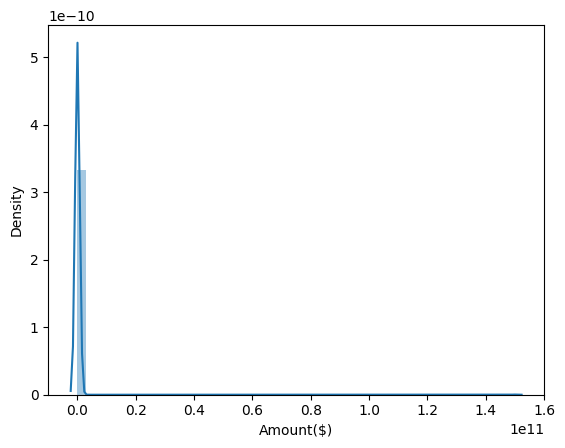

In [164]:
sns.distplot(year_of_existence_with_5years['Amount($)'])

Given this density plot, it's clear that the data distribution is highly skewed. This reinforces the earlier finding from the Shapiro-Wilk test that the data is not normally distributed.hence the reason for ussing the non-parametric test such as the mannwhitneyu test.

The density plot shows that most of the data points are concentrated around lower funding amounts.There is a long right tail, indicating the presence of some higher funding amounts, but these are much less frequent.

Looking at the sectors by Funding Amount


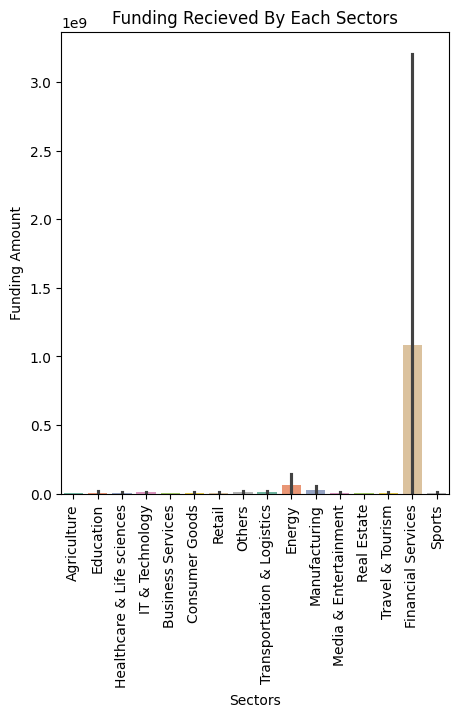

In [165]:
#  Set the color palette
palette = sns.color_palette("Set2")
plt.figure(figsize=(5,6))
sns.barplot(x='Sector',y='Amount($)',hue='Sector',data=year_of_existence_with_5years,palette=palette)
# plt.yscale('log')
plt.title('Funding Recieved By Each Sectors')
plt.xlabel('Sectors')
plt.ylabel('Funding Amount')
plt.xticks(rotation=90)
plt.show()

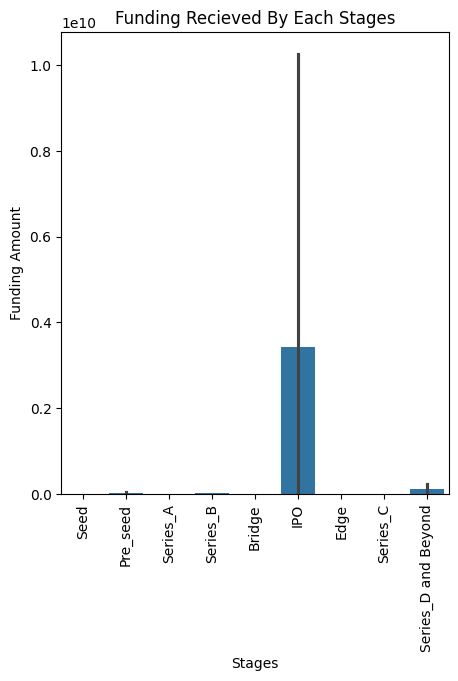

In [166]:
plt.figure(figsize=(5,6))
sns.barplot(data=year_of_existence_with_5years,x='Stage',y='Amount($)')

plt.title('Funding Recieved By Each Stages')
plt.xlabel('Stages')
plt.ylabel('Funding Amount')
plt.xticks(rotation=90)
plt.show()

In [167]:
# Scale data to millions for better readability
# df_2020_2021_2019_2018['Amount($M)'] = df_2020_2021_2019_2018['Amount($)'] / 1e6

# plt.figure(figsize=(14, 8))
# sns.barplot(x='Amount($M)', y='Sector', data=df_2020_2021_2019_2018, palette=palette, orient='h')
# plt.title('Funding Received By Each Sector (in Millions)')
# plt.xlabel('Funding Amount (Millions $)')
# plt.ylabel('Sectors')
# plt.show()


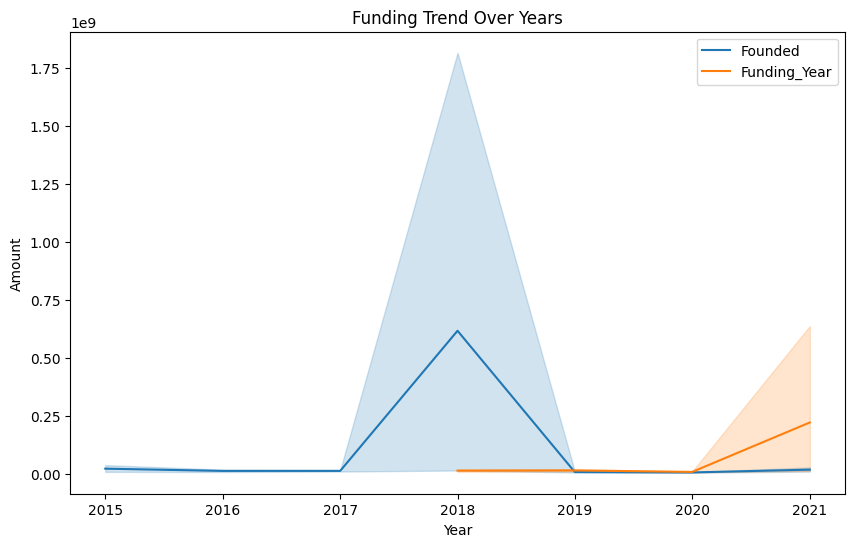

In [168]:
plt.figure(figsize=(10,6))

sns.lineplot(data=year_of_existence_with_5years,x='Founded',y='Amount($)',label='Founded')
sns.lineplot(data=year_of_existence_with_5years,x='Funding_Year',y='Amount($)',label='Funding_Year')
plt.title('Funding Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.show()

From the above visualization we can see that most of the startups were founded in 2018,also we can notice an increase in funding from 2020 

Analytical Questions

 What sector  has shown the highest growth in term of funding  recieve over the past 4 years?

what geograhical region within india have emerged as the primary hubs for startsup activities and investment and what factors contribute to their prominence

Are there any notable differences in funding patterns between early-stage startups and more established companies?


which sectors recieve the lowest level of funding and which sector recieve the highest level of funding in india and what factor contribute to this?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


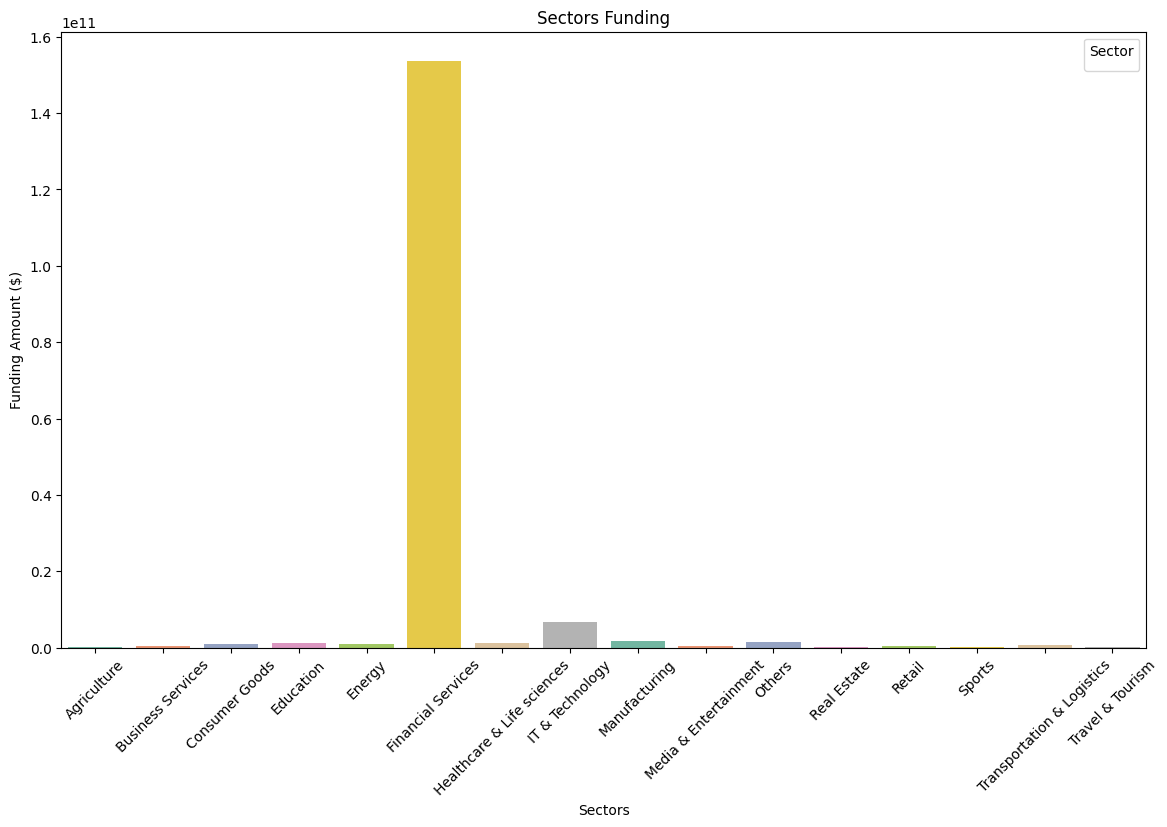

In [174]:
funds_recieved_by_sectors = year_of_existence_with_5years.groupby('Sector')['Amount($)'].sum().reset_index()
palette = sns.color_palette("Set2")

# Create a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Sector', y='Amount($)', hue='Sector', data=funds_recieved_by_sectors, palette=palette)
plt.title('Sectors Funding')
plt.xlabel('Sectors')
plt.ylabel('Funding Amount ($)')
plt.xticks(rotation=45)
plt.legend(title='Sector')
plt.show()

Which investor has more impact on startsup over the years?

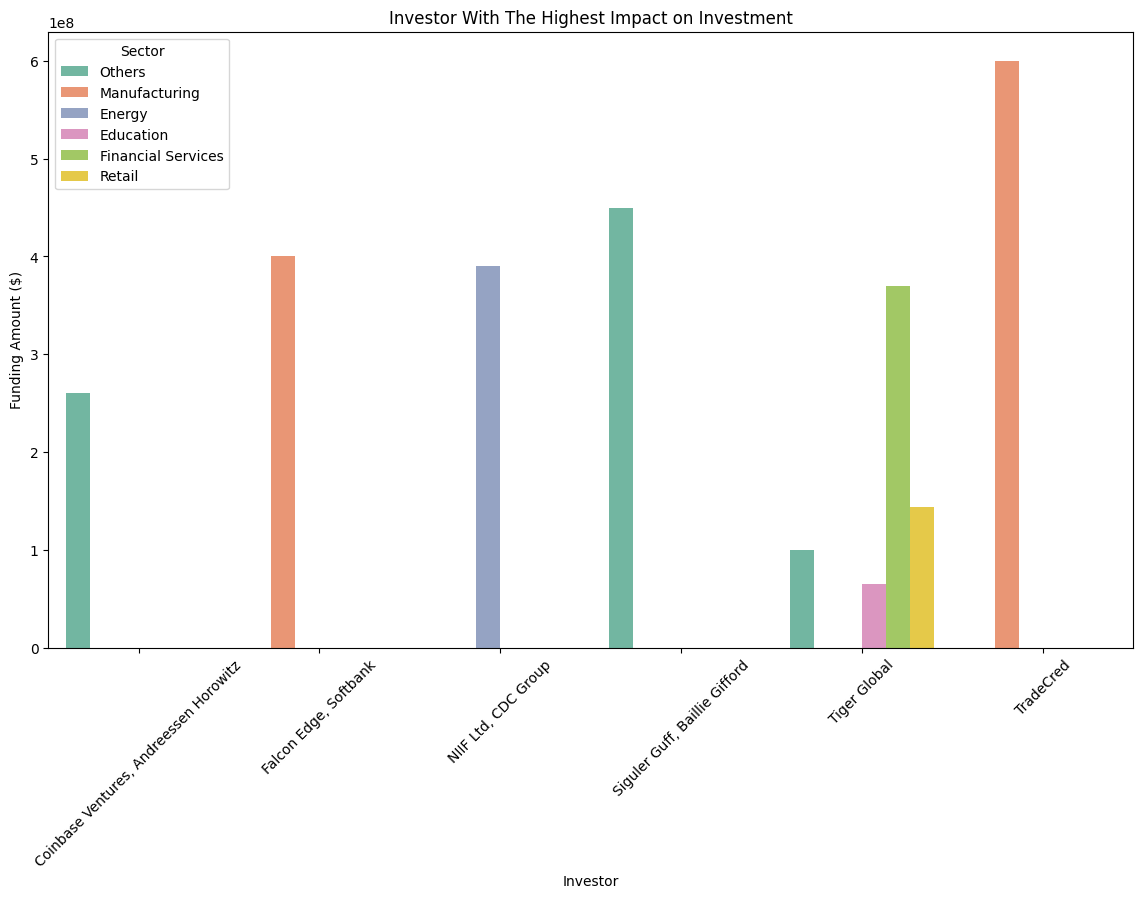

In [173]:
total_funding_by_investors = year_of_existence_with_5years.groupby('Investor')['Amount($)'].sum().reset_index()
# select the top 7 investors
top_7_investors = total_funding_by_investors.nlargest(7, 'Amount($)')['Investor']

# Filter original data to include only the top 7 investors
filtered_df = year_of_existence_with_5years[(year_of_existence_with_5years['Investor']!='Undisclosed') & (year_of_existence_with_5years['Investor'].isin(top_7_investors))]

# Group by Investor and Sector and sum the funding amounts
grouped_data = filtered_df.groupby(['Investor', 'Sector'])['Amount($)'].sum().reset_index()

# Print grouped data
#print(grouped_data)

# Set the color palette
palette = sns.color_palette("Set2")

# Create a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Investor', y='Amount($)', hue='Sector', data=grouped_data, palette=palette)
plt.title('Investor With The Highest Impact on Investment')
plt.xlabel('Investor')
plt.ylabel('Funding Amount ($)')
plt.xticks(rotation=45)
plt.legend(title='Sector')
plt.show()

From the visualization, it is evident that 'Tradecred' has made the highest investment in a single sector, specifically the manufacturing sector. In contrast, 'Tiger Global' has diversified its investments across four different sectors: retail, financial services, education, and others. Based on this observation, we can conclude that 'Tiger Global' is the most impactful investor in terms of funding for startups, due to its extensive and varied investment portfolio.